## **THE DATA**

Data used for this research is taken from NOAA (National Oceanic and Atmosferic Administration). NOAA published historic dataset of cyclones that occured in world in BigQuery and made it free to use for everyone.

Dataset link: https://console.cloud.google.com/bigquery?project=true-system-269116&p=bigquery-public-data&d=noaa_hurricanes&t=hurricanes&page=table

Dataset contains more than 600.000 storms that occured in the whole world.

For following the further research, go to github repository link and download hurricanes.rar file.  https://github.com/Meho96/MajorProject

**1.LOADING,CLEANING AND PREPROCESSING DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as path
import seaborn as sns

In [ ]:
uncleaned_data=pd.read_csv("/content/drive/My Drive/hurricaneData/hurricanes.csv",low_memory=False)

In [ ]:
uncleaned_data.head()

,sid,season,number,basin,subbasin,name,iso_time,nature,latitude,longitude,wmo_wind,wmo_pressure,wmo_agency,track_type,dist2land,landfall,iflag,usa_agency,usa_latitude,usa_longitude,usa_record,usa_status,usa_wind,usa_pressure,usa_sshs,usa_r34_ne,usa_r34_se,usa_r34_sw,usa_r34_nw,usa_r50_ne,usa_r50_se,usa_r50_sw,usa_r50_nw,usa_r64_ne,usa_r64_se,usa_r64_sw,usa_r64_nw,usa_poci,usa_roci,usa_rmw,...,bom_roci,bom_poci,bom_eye,bom_pos_method,bom_pressure_method,wellington_latitude,wellington_longitude,wellington_wind,wellington_pressure,nadi_latitude,nadi_longitude,nadi_cat,nadi_wind,nadi_pressure,ds824_latitude,ds824_longitude,ds824_stage,ds824_wind,ds824_pressure,td9636_latitude,td9636_longitude,td9636_stage,td9636_wind,td9636_pressure,td9635_latitude,td9635_longitude,td9635_wind,td9635_pressure,td9635_roci,neumann_latitude,neumann_longitude,neumann_class,neumann_wind,neumann_pressure,mlc_latitude,mlc_longitude,mlc_class,mlc_wind,mlc_pressure,usa_atcf_id
0,1971275N10176,1971,131,WP,MM,FAYE(GLORIA):GLORIA,1971-10-08 06:00:00 UTC,TS,14.4333,132.000,NaN,998.0,tokyo,main,745,704.0,IOOO_____III__,,NaN,NaN,,,35.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC,28.0,NaN,NaN,NaN,1.0,28.0,997.0,NaN,NaN,28.0,997.0,130.0,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,WP311971
1,1971275N10176,1971,131,WP,MM,FAYE(GLORIA):GLORIA,1971-10-08 12:00:00 UTC,TS,14.3273,131.136,NaN,996.0,tokyo,main,650,620.0,IOOO_____III__,,NaN,NaN,,,38.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC,31.0,NaN,NaN,NaN,1.0,31.0,996.0,NaN,NaN,31.0,996.0,140.0,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,WP311971
2,1971275N10176,1971,131,WP,MM,FAYE(GLORIA):GLORIA,1971-10-08 18:00:00 UTC,TS,14.1889,130.356,NaN,996.0,tokyo,main,576,512.0,IOOO_____III__,,NaN,NaN,,,40.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC,35.0,NaN,NaN,NaN,1.0,35.0,995.0,NaN,NaN,35.0,995.0,150.0,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,WP311971
3,1971275N10176,1971,131,WP,MM,FAYE(GLORIA):GLORIA,1971-10-08 00:00:00 UTC,TS,14.9500,132.875,NaN,998.0,tokyo,main,859,803.0,IOOO_____OOO__,,NaN,NaN,,,32.0,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.8,132.0,TC,25.0,NaN,15.8,132.0,1.0,25.0,999.0,15.8,132.0,25.0,999.0,120.0,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,WP311971
4,1971275N10176,1971,131,WP,MM,FAYE(GLORIA):GLORIA,1971-10-09 06:00:00 UTC,TS,14.2429,127.693,NaN,990.0,tokyo,main,327,303.0,IOO______III__,,NaN,NaN,,,46.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TC,41.0,NaN,NaN,NaN,1.0,41.0,992.0,NaN,NaN,41.0,992.0,170.0,NaN,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,WP311971


In [ ]:
uncleaned_data.sid.count()

681199

**This dataset contains more than 600.000 rows of global tropical cyclones and 151 columns.**

In [ ]:
uncleaned_data.basin.unique()

array(['WP', 'SP', 'SI', nan, 'EP', 'NI', 'SA'], dtype=object)

In [ ]:
uncleaned_data.basin.value_counts()

WP    229320
SI    156238
SP     65426
EP     57928
NI     53974
SA        30
Name: basin, dtype: int64

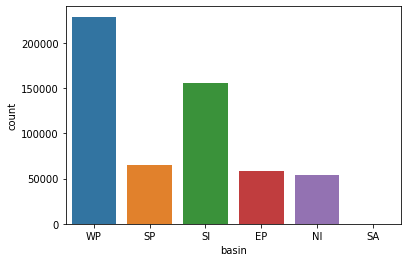

In [ ]:
sns.countplot(x="basin",data=uncleaned_data)

In [ ]:
uncleaned_data.subbasin.value_counts()

MM    420385
WA     47157
BB     40046
EA     31133
CS     15117
AS     13928
GM     13167
CP     10267
Name: subbasin, dtype: int64

In [ ]:
uncleaned_data.basin.isnull().sum(axis=0)

118283

Column basin represents the categories of tropical cyclones. 
NA - North Atlantic. EP - Eastern North Pacific. WP - Western North Pacific. NI- North Indian. SI - South Indian. SP - Southern Pacific. SA - South Atlantic. NaN - Missing 

**We are interested in Atlantic basin (North Atlantic and South Atlantic) which is marked with NA and SA.**

However, we can see that our dataset only has 30 rows that belong to South Atlantic basin and zero rows for North Atlantic. There is a huge possibility that many NA and SA datas are in null basin category.

Picture below shows the NA and SA basin area

![alt text](https://drive.google.com/uc?id=1G6VWcYrfTbM2rv4Cv1nvxjigzNWmYsfc)


We noticed that many Atlantic basin hurricanes are placed in unknown basin category. We gonna go trough the latitude and longitude of
 118 283 storm records which have unknown basin and check if they occured in Atlantic basin (NA and SA)

In [ ]:
atlanticData=pd.DataFrame(uncleaned_data[(uncleaned_data["basin"]=="NA") | (uncleaned_data["basin"]=="SA") | (uncleaned_data["basin"].isnull())])

In [ ]:
atlanticData.sid.count()

118313

The only way to properly categorize  hurricanes in North Atlantic(NA) and South Atlantic(SA) basin is to put geo points (latitude and longitude) around atlantic ocean and check if latitude and longitude of each storm record is in between before created geo points.

In [ ]:
 northAtlanticOcean = [(-29.6,71.5), (25.3,69.8), (5.7,61.4), (8.0,52.2), (1.7,48.4),(-0.8,43.0),
            (-7.45,42.5), (-7.0,37.6), (-5.3,35.0), (-7.5,30.9), (-10.5,28.4),
            (-11.4,24.5), (-12.5,14.4), (-5.7,8.1), (7.8,7.4), (9.9,3.4),(15.6,0.0),
            (-21,0.0),(-38,0.0),(-53,0.0),(-61.2,5.6),(-70.8,7.8),
            (-77.5,8.19),(-82.3,8.68),(-86.3,13.42), (-90.91,16.6), 
            (-97.3,18.06), (-101,24.9),(-99.43,29.84), (-93.68,32.36), (-90.30,32.85), (-97.1,25.5), (-81.95,37.24),
            (-73.77,44.41),(-70.95,59.17),(-44.5,60.1), (-38.8,65.1)]
            
 southAtlanticOcean=[(12.1,-1.1),(15.9,-12.1), (18.2,-24.63),       
            (21.7,-33.24), (18.9,-55.7), (-66,-55.7), (-71.0,-49.3), (-65.27,-36.27), (-53.0,-16.9),
            (-45.68,-6.48), (-41.6,-22.7),(-50,-0.1), (-38,-0.1), (-18,-0.1), (3.0,-0.1), (15.5,-0.1)]

To show geopoints on map, we can use geopandas library.

In [ ]:
pip install geopandas

     |████████████████████████████████| 972kB 7.1MB/s 
     |████████████████████████████████| 10.9MB 21.0MB/s 
     |████████████████████████████████| 14.8MB 206kB/s 


With the help of geopandas library we can show our points on the map. The map below shows the points we draw to mark North Atlantic ocean

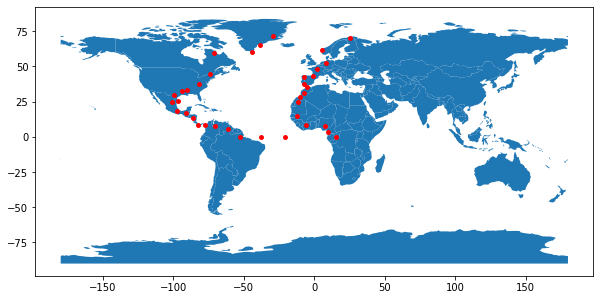

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

xx=np.array(northAtlanticOcean)
xxx=pd.DataFrame({'Longitude': xx[:, 0], 'Latitude': xx[:, 1]})

geometry = [Point(xy) for xy in zip(xxx['Longitude'], xxx['Latitude'])]
gdf = GeoDataFrame(xxx, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

The map below shows the points we draw to mark South Atlantic ocean

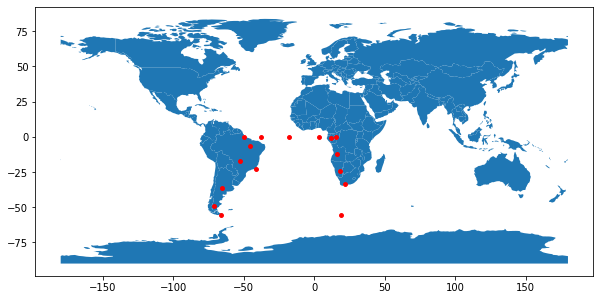

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

xx=np.array(southAtlanticOcean)
xxx=pd.DataFrame({'Longitude': xx[:, 0], 'Latitude': xx[:, 1]})

geometry = [Point(xy) for xy in zip(xxx['Longitude'], xxx['Latitude'])]
gdf = GeoDataFrame(xxx, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

Function myfunc takes latitude and longitude as parameters and checks if they belong to North Atlantic or South Atlantic ocean. 

In [ ]:
def myfunc(latitude,longitude):
  p1 = path.Path(northAtlanticOcean)
  p2=path.Path(southAtlanticOcean)
  target = [(longitude, latitude)]
  result1 = p1.contains_points(target)
  result2 = p2.contains_points(target)
  if result1==True: 
    return "NA" 
  else:
    if result2==True:
      return "SA"
    else:
      return "AA"


Next line of code is loop that goes trough each row of our dataset and calls myfunc to check in which basins the storm occured.

In [ ]:
d=[]
for index,row in atlanticData.iterrows():
   valueK=myfunc(row.latitude,row.longitude)
   d.append(valueK)

In [ ]:
atlanticData["basin"]=d

In [ ]:
atlanticData.basin.value_counts()

NA    115336
AA      2947
SA        30
Name: basin, dtype: int64

We can notice that most of the unknown data is actually belonging to North Atlantic ocean and only 30 rows for SA ocean.

Many storms after being created on the sea, end up on the land. We gonna use SID of North Atlantic storms to check if the storms that are under the unknown category are matching the ID of known storms.

In [ ]:
filteredData=atlanticData[atlanticData["basin"]=="NA"]
unique_sid=filteredData.sid.unique()
i=0
for index,row in atlanticData[atlanticData["basin"]=="AA"].iterrows():
  if row.sid in unique_sid:
    atlanticData.loc[index,"basin"]="NA"

In [ ]:
atlanticData.loc[atlanticData.sid=="1969277N16264",["basin"]]="NA"

South atlantic basin has record of only 30 storms, which is very low number. For that reason we gonna only use storm record of North Atlantic ocean.

In [ ]:
atlanticData=pd.DataFrame(atlanticData[(atlanticData["basin"]=="NA") ])

In [ ]:
atlanticData.sid.count()

118282

To double check if all our storms are properly categorized, we are going to show them all on map.

In [ ]:
tempStorms=atlanticData[['longitude', 'latitude']].to_numpy()

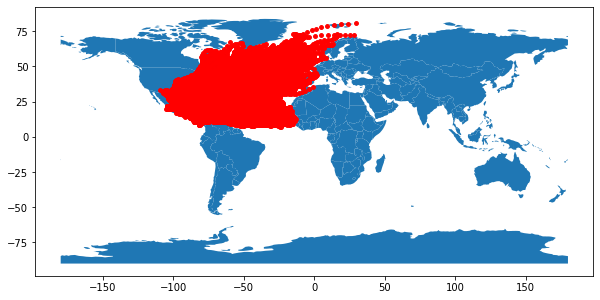

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

xx=np.array(tempStorms)
xxx=pd.DataFrame({'Longitude': xx[:, 0], 'Latitude': xx[:, 1]})

geometry = [Point(xy) for xy in zip(xxx['Longitude'], xxx['Latitude'])]
gdf = GeoDataFrame(xxx, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

It is important to know in which part of North Atlantic ocean (subbasin) storm occured. 

In [ ]:
atlanticData.subbasin.value_counts()

CS    15117
GM    13166
Name: subbasin, dtype: int64

There are 7 subbasins in total. However, only two are marked in our dataset. We gonna deal with subbasins later, after cleaning data.

# **COLUMN CLEANING**

In [ ]:
atlanticData.isnull().sum()

sid                   0
season                0
number                0
basin                 0
subbasin          89999
                  ...  
mlc_longitude     87823
mlc_class             0
mlc_wind          87682
mlc_pressure     115149
usa_atcf_id           0
Length: 151, dtype: int64

In [ ]:
100*atlanticData.isnull().mean()[100:150]

bom_r34_se              100.000000
bom_r34_sw              100.000000
bom_r34_nw              100.000000
bom_r50_ne              100.000000
bom_r50_se              100.000000
bom_r50_sw              100.000000
bom_r50_nw              100.000000
bom_r64_ne              100.000000
bom_r64_se              100.000000
bom_r64_sw              100.000000
bom_r64_nw              100.000000
bom_roci                100.000000
bom_poci                100.000000
bom_eye                 100.000000
bom_pos_method          100.000000
bom_pressure_method     100.000000
wellington_latitude     100.000000
wellington_longitude    100.000000
wellington_wind         100.000000
wellington_pressure     100.000000
nadi_latitude           100.000000
nadi_longitude          100.000000
nadi_cat                100.000000
nadi_wind               100.000000
nadi_pressure           100.000000
ds824_latitude           99.993237
ds824_longitude          99.993237
ds824_stage               0.000000
ds824_wind          

**Looking at the data, we notice that many columns are 100 % empty. Also there** **are many columns that are not relevant for atlantic hurricanes. We can delete those columns.**

In [ ]:
atlanticData=atlanticData.dropna(how='all', axis=1)

In [ ]:
atlanticData.describe

<bound method NDFrame.describe of                   sid  season  number  ... mlc_wind mlc_pressure usa_atcf_id
58      2018267N33314    2018      70  ...      NaN          NaN    AL132018
73      2018246N22283    2018      61  ...      NaN          NaN    AL072018
74      2018246N22283    2018      61  ...      NaN          NaN    AL072018
79      2018267N33314    2018      70  ...      NaN          NaN    AL132018
82      2018267N33314    2018      70  ...      NaN          NaN    AL132018
...               ...     ...     ...  ...      ...          ...         ...
676773  2012223N14317    2012      45  ...      NaN          NaN    AL072012
676774  2017228N14314    2017      61  ...      NaN          NaN    AL092017
676775  2018187N10319    2018      38  ...      NaN          NaN    AL022018
676776  2003188N11307    2003      44  ...      NaN          NaN    AL042003
676777  2005318N13298    2005     106  ...      NaN          NaN    AL282005

[118282 rows x 59 columns]>

In [ ]:
100*atlanticData.isnull().mean()

sid                  0.000000
season               0.000000
number               0.000000
basin                0.000000
subbasin            76.088500
name                 0.000000
iso_time             0.000000
nature               0.000000
latitude             0.000000
longitude            0.000000
wmo_wind            57.804231
wmo_pressure        83.417595
wmo_agency           0.000000
track_type           0.000000
dist2land            0.000000
landfall             1.865034
iflag                0.000000
usa_agency           0.000000
usa_latitude        16.838572
usa_longitude       16.838572
usa_record           0.000000
usa_status           0.000000
usa_wind            17.376270
usa_pressure        61.081145
usa_sshs             0.546998
usa_r34_ne          90.020460
usa_r34_se          90.542094
usa_r34_sw          92.314131
usa_r34_nw          91.138973
usa_r50_ne          94.840297
usa_r50_se          95.202144
usa_r50_sw          95.889484
usa_r50_nw          95.463384
usa_r64_ne

In [ ]:
atlanticData=atlanticData.drop([ "usa_r34_ne","usa_r34_se","usa_r34_sw","usa_r34_nw","usa_r50_ne","usa_r50_se",
"usa_r50_sw","usa_r50_nw","usa_r64_ne","usa_r64_se","usa_r64_sw","usa_r64_nw","usa_poci","usa_roci","usa_rmw","usa_record",
"hko_cat","newdelhi_grade","ds824_latitude","ds824_longitude","ds824_wind","ds824_stage","td9636_latitude","td9636_longitude","td9636_stage",
"td9636_wind","neumann_class","mlc_latitude","mlc_longitude","usa_eye","mlc_class","iflag","usa_agency","nature","wmo_agency","track_type","hko_latitude"],axis=1)

**Around 90 columns from dataset were deleted. Either those columns weren't connected to** **the hurricanes or there were completely empty.**

In [ ]:
atlanticData.head()

,sid,season,number,basin,subbasin,name,iso_time,latitude,longitude,wmo_wind,wmo_pressure,dist2land,landfall,usa_latitude,usa_longitude,usa_status,usa_wind,usa_pressure,usa_sshs,mlc_wind,mlc_pressure,usa_atcf_id
58,2018267N33314,2018,70,NA,NaN,LESLIE,2018-09-26 12:00:00 UTC,33.7468,-40.0305,NaN,NaN,1814,1719.0,33.7468,-40.0305,,57.0,986.0,0.0,NaN,NaN,AL132018
73,2018246N22283,2018,61,NA,NaN,GORDON,2018-09-06 06:00:00 UTC,33.5131,-90.9543,NaN,NaN,0,0.0,33.5131,-90.9543,,28.0,1013.0,-1.0,NaN,NaN,AL072018
74,2018246N22283,2018,61,NA,NaN,GORDON,2018-09-06 18:00:00 UTC,34.4372,-91.6335,NaN,NaN,0,0.0,34.4372,-91.6335,,32.0,1013.0,-1.0,NaN,NaN,AL072018
79,2018267N33314,2018,70,NA,NaN,LESLIE,2018-09-25 18:00:00 UTC,32.5512,-44.0316,NaN,NaN,1742,1717.0,32.5512,-44.0315,,32.0,1004.0,-1.0,NaN,NaN,AL132018
82,2018267N33314,2018,70,NA,NaN,LESLIE,2018-09-26 18:00:00 UTC,36.0202,-39.8998,NaN,NaN,1613,1524.0,36.0202,-39.8998,,60.0,979.0,0.0,NaN,NaN,AL132018


In [ ]:
100*atlanticData.isnull().mean()[0:50]

sid               0.000000
season            0.000000
number            0.000000
basin             0.000000
subbasin         76.088500
name              0.000000
iso_time          0.000000
latitude          0.000000
longitude         0.000000
wmo_wind         57.804231
wmo_pressure     83.417595
dist2land         0.000000
landfall          1.865034
usa_latitude     16.838572
usa_longitude    16.838572
usa_status        0.000000
usa_wind         17.376270
usa_pressure     61.081145
usa_sshs          0.546998
mlc_wind         74.129622
mlc_pressure     97.351245
usa_atcf_id       0.000000
dtype: float64

**There is around 25 columns left. Lets see what can be done with those columns**

**LATITUDE AND LONGITUDE**

This dataset shows data from different meteorological agencies such as Japan Meteorological Agency, US Agency, Shangaii Typhoon institute, Hong Kong observatory and so on. That is the reason why this dataset contains many columns for latitude and longitude for the same storm. 

Lets compare those columns

In [ ]:
atlanticData.loc[0:100,["latitude","longitude","usa_latitude","usa_longitude"]].head()

,latitude,longitude,usa_latitude,usa_longitude
58,33.7468,-40.0305,33.7468,-40.0305
73,33.5131,-90.9543,33.5131,-90.9543
74,34.4372,-91.6335,34.4372,-91.6335
79,32.5512,-44.0316,32.5512,-44.0315
82,36.0202,-39.8998,36.0202,-39.8998


All these columns represents the same latitudes and longitudes located from different meteorological stations. All columns are pretty much precise. For that reason we can leave one latitude and longitude column and delete the rest of it

In [ ]:
atlanticData=atlanticData.drop(["usa_latitude","usa_longitude"],axis=1)

**WIND STRENGTH AND HURRICANE CATEGORIES**

Wind strength plays a key role in our research. Type of a cyclone and it's intensity are in close relation to wind strength. 

In [ ]:
tempWind=atlanticData[(atlanticData["usa_wind"]>0) &(atlanticData["usa_sshs"]>-5)]

Text(0.5, 0, 'Wind strength')

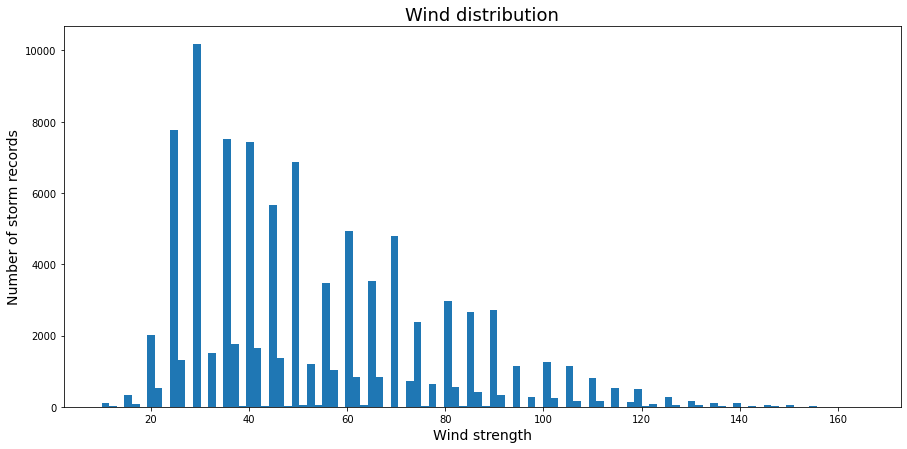

In [ ]:
plt.figure(num=1, figsize=(15,7))
plt.hist(tempWind['usa_wind'],bins=100)
plt.title('Wind distribution',size=18)
plt.ylabel('Number of storm records',size=14)
plt.xlabel('Wind strength',size=14)

most of our dataset has a storms with wind strength between 20 and 60 knots. 

Text(0.5, 0, 'Hurricane category')

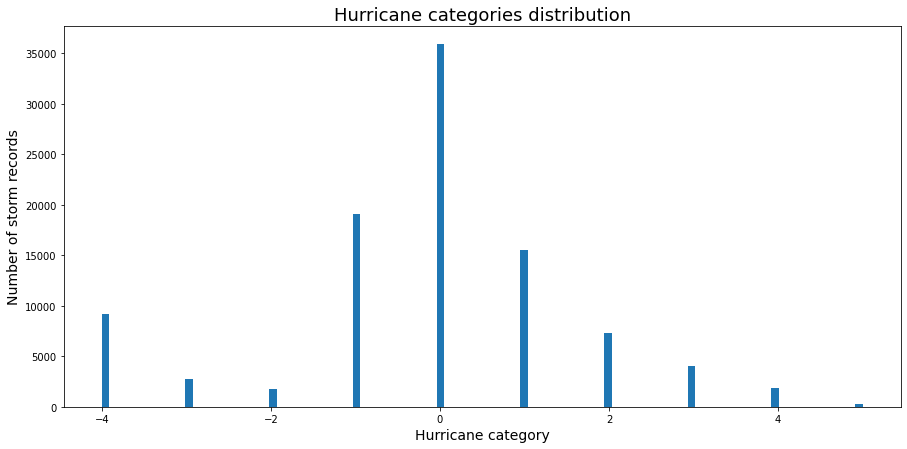

In [ ]:
plt.figure(num=1, figsize=(15,7))
plt.hist(tempWind.sort_values(by=["usa_sshs"]).usa_sshs,bins=100)
plt.title('Hurricane categories distribution',size=18)
plt.ylabel('Number of storm records',size=14)
plt.xlabel('Hurricane category',size=14)

Hurricane categories are unevenly distributed. We have a very small number of hurricanes that belong to category 4 and 5

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


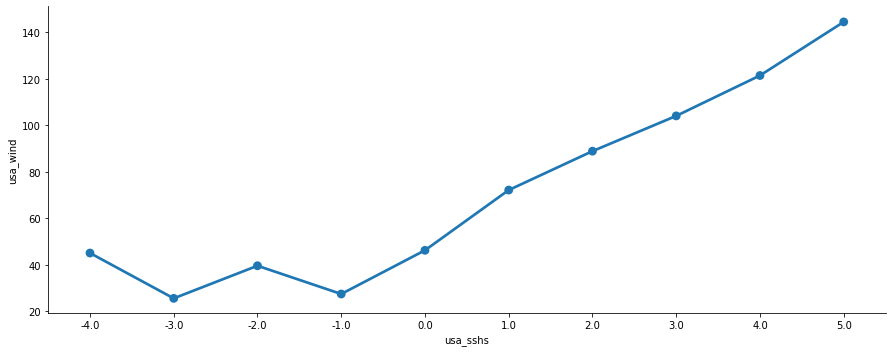

In [ ]:
axes = sns.factorplot('usa_sshs','usa_wind', 
                      data=tempWind, aspect = 2.5, )

On the other side, we can see that there is a big correlation between wind and hurricane categories

**Now  we can see what we can do with wind columns**

![alt text](https://drive.google.com/uc?id=1nwV54nu3rPMHku39G3vmR9e2PpZRtjAc)

In [ ]:
wind=pd.DataFrame(atlanticData.loc[:,["wmo_wind","usa_wind","mlc_wind","usa_sshs",]])


In [ ]:
wind[(wind["wmo_wind"]>0) & (wind["usa_wind"]>0) & (wind["mlc_wind"]>0)]

,wmo_wind,usa_wind,mlc_wind,usa_sshs
472043,70.0,70.0,60.0,-4.0
472044,70.0,70.0,65.0,-4.0
472045,70.0,70.0,55.0,-4.0
472046,80.0,80.0,60.0,-4.0
472047,60.0,60.0,60.0,-4.0
...,...,...,...,...
602902,60.0,60.0,53.0,0.0
602903,60.0,60.0,77.0,0.0
602904,40.0,40.0,40.0,0.0
602905,50.0,50.0,35.0,0.0


We can notice that columns wmo_wind and usa_wind have identical results for the same records, while there is deviation in mlc_wind column. For that reason, we gonna use columns wmo_wind and usa_wind and drop column mlc_wind.

In [ ]:
atlanticData=atlanticData.drop(["mlc_wind"],axis=1)
wind=wind.drop(["mlc_wind"],axis=1)

In [ ]:
100*wind.isnull().mean()

wmo_wind    57.804231
usa_wind    17.376270
usa_sshs     0.546998
dtype: float64

usa_wind column has only 17 % of data missing. However, wind speed is quite crucial information for our research and we gonna try to fill any missing data that can be filled.

In [ ]:
for index,row in wind.iterrows():
  if row.usa_wind>0:
    row.usa_wind=row.usa_wind
  else:
     if row.wmo_wind>0:
       row.usa_wind=row.wmo_wind
     else:
       row.usa_wind=0

After combining wind data from columns usa_wind and wind_wmo into usa_wind column, I can delete wmo_wind column.

In [ ]:
atlanticData=atlanticData.drop(["wmo_wind"],axis=1)
wind=wind.drop(["wmo_wind"],axis=1)

In [ ]:
atlanticData[(atlanticData["usa_wind"].isnull())]

,sid,season,number,basin,subbasin,name,iso_time,latitude,longitude,wmo_pressure,dist2land,landfall,usa_status,usa_wind,usa_pressure,usa_sshs,mlc_pressure,usa_atcf_id
91981,2017264N18314,2017,1,NA,NaN,LEE,2017-09-21 06:00:00 UTC,24.3631,-46.9912,NaN,2036,NaN,,NaN,NaN,-1.0,NaN,AL142017
97439,2017264N18314,2017,1,NA,NaN,LEE,2017-09-21 00:00:00 UTC,20.8119,-47.3325,NaN,1826,1826.0,,NaN,NaN,-1.0,NaN,AL142017
199940,2017264N18314,2017,1,NA,NaN,LEE,2017-09-21 03:00:00 UTC,22.5034,-47.2018,NaN,1969,1969.0,,NaN,NaN,-1.0,NaN,AL142017
202449,2017264N18314,2017,1,NA,NaN,LEE,2017-09-20 21:00:00 UTC,19.4198,-47.3511,NaN,1681,1681.0,,NaN,NaN,-1.0,NaN,AL142017
443142,1852253N26270,1852,10,NA,NaN,NOT_NAMED,1852-09-14 06:00:00 UTC,37.7000,-61.5000,NaN,720,720.0,,NaN,NaN,NaN,975.0,AL031852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662189,1858291N21287,1858,17,NA,NaN,NOT_NAMED,1858-10-26 09:00:00 UTC,41.2566,-58.4980,NaN,481,471.0,TS,NaN,NaN,-1.0,NaN,AL061858
662190,1881223N16329,1881,27,NA,NaN,NOT_NAMED,1881-08-18 21:00:00 UTC,35.5524,-48.7502,NaN,1277,1241.0,TS,NaN,NaN,-1.0,NaN,AL031881
662191,1882278N11279,1882,35,NA,NaN,NOT_NAMED,1882-10-15 21:00:00 UTC,40.1519,-69.4435,NaN,174,139.0,TS,NaN,NaN,-1.0,988.0,AL061882
662194,1871159N23270,1871,12,NA,GM,NOT_NAMED,1871-06-09 03:00:00 UTC,27.0425,-93.6579,NaN,267,NaN,TS,NaN,NaN,-1.0,NaN,AL021871


After dealing with wind data, we still have around 20 000 rows that don't have any wind speed. 

This is where we can use usa_sshs column, for rows that have usa_sshs value but dont have wind speed. Every value of usa_sshs represent range of wind speed. We can fill wind speed by using random value between that range.

usa_sshs is columns that shows wind categories in Saffir-Simpson Hurricane Scale. 

![alt text](https://drive.google.com/uc?id=1x6O38ULfKvjDA3IcuubVFuUk_ToR5gwm)


In [ ]:
wind.usa_sshs.value_counts()

-1.0    38966
 0.0    35885
 1.0    15562
-4.0     9208
 2.0     7259
 3.0     4053
-3.0     2745
 4.0     1890
-2.0     1764
 5.0      303
Name: usa_sshs, dtype: int64

In [ ]:
import random

In [ ]:
round(random.uniform(21,33.2),1)

26.4

In [ ]:
wind.usa_wind.max()

165.0

In [ ]:
for index,row in wind.iterrows():
  if row.usa_wind==0:
    if row.usa_sshs>-2:
      if row.usa_sshs==-1:
        row.usa_wind=round(random.uniform(1,33),1)
      if row.usa_sshs==0:
        row.usa_wind=round(random.uniform(34,63),1)
      if row.usa_sshs==1:
        row.usa_wind=round(random.uniform(64,82),1)
      if row.usa_sshs==2:
        row.usa_wind=round(random.uniform(83,95),1)
      if row.usa_sshs==3:
        row.usa_wind=round(random.uniform(96,112),1)
      if row.usa_sshs==4:
        row.usa_wind=round(random.uniform(113,136),1)
      if row.usa_sshs==5:
        row.usa_wind=round(random.uniform(137,170),1)        


In [ ]:
wind[(wind["usa_wind"]==0) | (wind["usa_wind"].isnull())]

,usa_wind,usa_sshs
443142,0.0,NaN
443145,0.0,NaN
443146,0.0,NaN
443174,0.0,NaN
443178,0.0,NaN
...,...,...
482467,0.0,-4.0
482468,0.0,-4.0
482469,0.0,-4.0
482470,0.0,-4.0


We are left with only 607 rows of missing data.

We can now use the opposite technique, and fill missing usa_sshs using wind data.

In [ ]:
wind["usa_sshs"]=wind["usa_sshs"].fillna(-5)

In [ ]:
for index,row in wind.iterrows():
  if row.usa_sshs==-5:
    if row.usa_wind>0:
      if (row.usa_wind>0) & (row.usa_wind<34):
        row.usa_sshs=-1
      if (row.usa_wind>=34) & (row.usa_wind<64):
        row.usa_sshs=0
      if (row.usa_wind>=64) & (row.usa_wind<83):
        row.usa_sshs=1
      if (row.usa_wind>=83) & (row.usa_wind<96):
        row.usa_sshs=2
      if (row.usa_wind>=96) & (row.usa_wind<=113):
        row.usa_sshs=3
      if (row.usa_wind>=113) & (row.usa_wind<137):
        row.usa_sshs=4
      if (row.usa_wind>=137):
        row.usa_sshs=5

In [ ]:
atlanticData["usa_wind"]=wind["usa_wind"]
atlanticData["usa_sshs"]=wind["usa_sshs"]

We can delete 607 rows of data that don't have wind value

In [ ]:
atlanticData=atlanticData[atlanticData["usa_wind"]>0]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


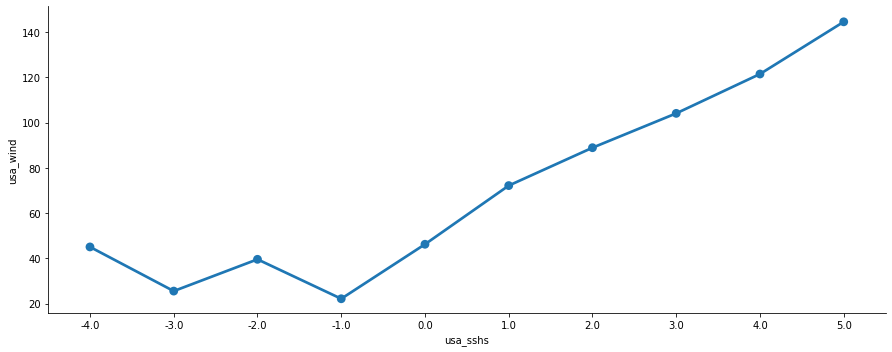

In [ ]:
axes = sns.factorplot('usa_sshs','usa_wind', 
                      data=atlanticData, aspect = 2.5, )

Plotting correlation between usa_sshs and usa_wind on a newly filled dataset, we can see that correlation is still the same. Which means that we managed to mantain the dependencies.

**PRESSURE**

atlantic hurricane data also has more than one pressure column. We can do very similair process as we did with wind columns.

In [ ]:
100*atlanticData.isnull().mean()

sid              0.000000
season           0.000000
number           0.000000
basin            0.000000
subbasin        76.027799
name             0.000000
iso_time         0.000000
latitude         0.000000
longitude        0.000000
wmo_pressure    83.336024
dist2land        0.000000
landfall         1.842774
usa_status       0.000000
usa_wind         0.000000
usa_pressure    60.889697
usa_sshs         0.000000
mlc_pressure    97.465655
usa_atcf_id      0.000000
dtype: float64

In [ ]:
pressure=pd.DataFrame(atlanticData.loc[:,["wmo_pressure","usa_pressure","mlc_pressure"]])
pressure.head()

,wmo_pressure,usa_pressure,mlc_pressure
58,NaN,986.0,NaN
73,NaN,1013.0,NaN
74,NaN,1013.0,NaN
79,NaN,1004.0,NaN
82,NaN,979.0,NaN


In [ ]:
100*pressure.isnull().mean()

wmo_pressure    83.336024
usa_pressure    60.889697
mlc_pressure    97.465655
dtype: float64

All 3 pressure columns are missing lots of data. usa_pressure has the most known data, so we gonna use that as a start point.

Also, comparing all 3 pressure columns, we can see that deviation beetween columns is relatively small.

In [ ]:
pressure[(pressure["usa_pressure"]>0) & (pressure["wmo_pressure"]>0)&(pressure["mlc_pressure"]>0)]

,wmo_pressure,usa_pressure,mlc_pressure
472781,987.0,987.0,987.0
472802,972.0,972.0,972.0
472863,980.0,980.0,980.0
472883,963.0,963.0,962.0
488311,983.0,983.0,971.0
...,...,...,...
601659,985.0,985.0,985.0
601687,987.0,987.0,987.0
601705,994.0,994.0,994.0
602476,988.0,988.0,988.0


In [ ]:
for index,row in pressure.iterrows():
  if row.usa_pressure>0:
    row.usa_pressure=row.usa_pressure
  else:
    if row.wmo_pressure>0:
      row.usa_pressure=row.wmo_pressure
    else:
      if row.mlc_pressure>0:
        row.usa_pressure=row.mlc_pressure
      else:
        row.usa_pressure=0
  

In [ ]:
pressure.usa_pressure.value_counts()

0.0       69083
1005.0     2060
1006.0     1966
1007.0     1903
1008.0     1891
          ...  
890.0         1
906.0         1
889.0         1
882.0         1
895.0         1
Name: usa_pressure, Length: 138, dtype: int64

Using this method we filled around 3 000 rows. That leaves us with around 69 000 rows of missing data for pressure.

69 000 rows with missing pressure column is not acceptable to delete as that makes half of our dataset. In later research, we will try to fill those values.

In [ ]:
atlanticData=atlanticData.drop(["wmo_pressure","mlc_pressure"],axis=1)
pressure=pressure.drop(["wmo_pressure","mlc_pressure"],axis=1)
atlanticData["usa_pressure"]=pressure["usa_pressure"]

In [ ]:
atlanticData.head()

,sid,season,number,basin,subbasin,name,iso_time,latitude,longitude,dist2land,landfall,usa_status,usa_wind,usa_pressure,usa_sshs,usa_atcf_id
58,2018267N33314,2018,70,NA,NaN,LESLIE,2018-09-26 12:00:00 UTC,33.7468,-40.0305,1814,1719.0,,57.0,986.0,0.0,AL132018
73,2018246N22283,2018,61,NA,NaN,GORDON,2018-09-06 06:00:00 UTC,33.5131,-90.9543,0,0.0,,28.0,1013.0,-1.0,AL072018
74,2018246N22283,2018,61,NA,NaN,GORDON,2018-09-06 18:00:00 UTC,34.4372,-91.6335,0,0.0,,32.0,1013.0,-1.0,AL072018
79,2018267N33314,2018,70,NA,NaN,LESLIE,2018-09-25 18:00:00 UTC,32.5512,-44.0316,1742,1717.0,,32.0,1004.0,-1.0,AL132018
82,2018267N33314,2018,70,NA,NaN,LESLIE,2018-09-26 18:00:00 UTC,36.0202,-39.8998,1613,1524.0,,60.0,979.0,0.0,AL132018


In [ ]:
atlanticData["storm_id"]=atlanticData["usa_atcf_id"].apply(lambda x: x[2:4])

In [ ]:
atlanticData["storm_id"]=atlanticData["storm_id"].replace("","0")

In [ ]:
atlanticData.storm_id=atlanticData.storm_id.astype(int)

In [ ]:
atlanticData=atlanticData.drop(["usa_status","usa_atcf_id","name"],axis=1)

In [ ]:
atlanticData.isnull().sum()

sid                 0
season              0
number              0
basin               0
subbasin        89487
iso_time            0
latitude            0
longitude           0
dist2land           0
landfall         2169
usa_wind            0
usa_pressure        0
usa_sshs            0
storm_id            0
dtype: int64

Another column with missing values is landfall. 

In [ ]:
atlanticData.landfall.isnull().sum()

2169

In [ ]:
atlanticData.corr()["landfall"].sort_values()

usa_wind       -0.081874
usa_sshs       -0.029340
latitude       -0.022515
usa_pressure    0.044559
season          0.050470
storm_id        0.074894
number          0.101534
longitude       0.736087
dist2land       0.999200
landfall        1.000000
Name: landfall, dtype: float64

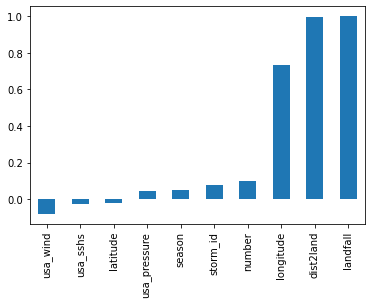

In [ ]:
atlanticData.corr()["landfall"].sort_values().plot(kind="bar")

Column dist2land correlates strongly with landfall. We can group the dataframe by dist2land and calculate the mean value for the landfall.

In [ ]:
dist2land_avg=atlanticData.groupby("dist2land").mean()["landfall"]

In [ ]:
def fill_landfall(landfall,dist2land):
  if np.isnan(landfall):
    return dist2land_avg[dist2land]
  else:
    return landfall

In [ ]:
atlanticData["landfall"]=atlanticData.apply(lambda x: fill_landfall(x["landfall"],x["dist2land"]),axis=1)

In [ ]:
atlanticData[atlanticData["landfall"].isnull()]

,sid,season,number,basin,subbasin,iso_time,latitude,longitude,dist2land,landfall,usa_wind,usa_pressure,usa_sshs,storm_id


We are left with missing values in two columns, subbasin and pressure. Around 80 % of subbasin data is empty.

**SUBBASINS**

Our data isn't properly divided in subbasins. North atlantic has 7 subbasins. North-Eastern Basin (Norwegian sea), Central-Eastern basin, South-Eastern basin, North-Western Basin (Labrador Sea), Central-Western basin, South-Western basin(Carribian Sea) and Southern Basin.

Using information provided from this website (http://joa.ucsd.edu/data/reid/Atlantic/subbasin ), we can divide North Atlantic by subbasins.

![alt text](https://drive.google.com/uc?id=1Pf_YBNKXwNbqPuRun6YB9YODT5Pmg4lA)

In [ ]:
CENA = [(-8.09,35.988), (-5.15978,36.54089),(-2.03966,36.91073), (-1.31456,38.4066), (2.54163,41.55825), 
            (6.27698,43.24553), (8.86975,44.54382),(12.82483,47.562), (18.75745,50.45779),
            (21.483,54.833), (20.933,57.216),(21.483,63.8), (-8,70.5), (-15,70.5), (-30.17738,71.75058),
            (-36.95483,67.28469), (-29.416,61.866), (-30.083,58), (-35.198,53), (-31.776,50.31),
            (-30.95,40.571),(-27.965,35.988)]
SENA = [(-3.628,-10.173), (12.661,-10.173), (12.661,2.65), (-1.816,4), (-9,5.075),
            (-11.566,10.966), (-9.133,23.8), (-7.988,28.495), 
            (-1.61736,29.2021), (3.83185,31.17715), (8.31427,30.64931),(5.67755,36.29039),
            (1.10724,37.69431),(-3.1115,36.00651), (-5.766,35.8), (-6,36.333), (-7.3,36.666), (-7.905,36),
            (-8.5,35.766),(-9.133,37.166),(-12.25599,37.91999),(-15.63978,38.26584),(-19.28724,38.36928),
            (-22.658,37.585),(-25.683,36.916),(-27.446,35.988),(-31.846,37.588),
            (-29.978,35),(-30.043,30.811),(-39.466,24.81),(-38,16.408),(-28.091,3.046)]   

SWNA = [(-67.365,39.805), (-73.06853,40.81032), (-76.67205,40.74376), (-82.08123,40.12182), (-91.04607,40.79058),
            (-100.80193,40.52387), (-108.00896,40.59065), (-123.38982,39.17442), (-118.73162,33.73536),
            (-111.52459,24.53919), (-106.51482,22.93013), (-104.14177,16.90134), (-96.31951,13.68022), (-87.9699,10.15498),
            (-82.78435,4.84147), (-75.66521,1.77078), (-70.91912,4.75388), (-70.21599,8.50721), (-71,11.15),
            (-72.15589,15.07506), (-72.02406,17.89801), (-71.06,20.183), (-65.46599,25.133), (-65.466,31.883),
            (-64.883,34.508), (-65.07049,37.0515)]    

CWNA = [(-35,34.368), (-42.72,35.128), (-49.926,35.128), (-57.43421,36.1519), (-61.87269,36.18737),
            (-68.033,36), (-73.98299,36.5),(-83.86785,37.41887), (-89.75652,38.11365),(-95.46942,38.3208), (-102.94012,39.61906), 
            (-112.36585,45.62618), (-114.38734,51.65607), (-109.02601,55.86039),
            (-91.62367,56.83443), (-83.71351,57.50154), (-77.47328,58.15668),(-67.98109,58.95896), (-57.801,57.446), (-48.783,59.516),
            (-41.52601,63.18203), (-28,63.33), (-24.47523,58.2493),(-25.09046,48.73141), (-23.50843,42.72749)]       

SNA = [(-4.2589,-10.19043), (-20.69444,-9.10735), (-33.35069,-11.70049), (-39.8546,-13.92857), (-44.42491,-12.04453),
            (-57.66062,-5.24871), (-62.06738,-0.72365), (-71.16438,3.22367), (-75.59031,9.50953),
            (-73.125,15.093), (-71.25195,19.89206), (-73.12937,29.43558), (-70.75633,31.18067), (-69.46599,37.466),
            (-60.29734,42.3389), (-51.68406,42.72749), (-33.05125,43.7519),(-31.59288,33.68334), (-32.99913,30.40618),
            (-31.645,20.60791),(-31.59288,11.99112), (-27.46202,2.84993),(-20.25499,3.3765), (-7.9503,-2.50941)]      

NWNA = [(-30.89774,75.99879), (-28.96414,73.80488), (-27.55789,68.94848), (-27.20633,66.2026), (-27.73367,61.23582),
            (-33.53446,57.28788), (-43.90555,57.0974), (-56.21024,55.53788), (-65.35086,53.28813),
            (-77.83133,47.94202), (-90.48758,51.57357), (-102.43273,55.77357), (-105.24523,62.34713), (-104.36632,66.92797),
            (-102.46463,72.58572), (-99.09288,74.72821), (-80.63585,75.80081), (-66.22179,76.8396), (-50.75304,76.67855)]    

NENA = [(36.25867,67.47288), (29.22742,63.85768), (21.84461,61.35205), (16.04383,60.41122), (9.53992,62.34713),
            (-4.34679,64.77185), (-11.02648,66.85898), (-21.39757,68.3324), (-25.96788,71.1292),
            (-26.31944,75.00356), (-20.34288,76.05722), (-21.04601,78.27711), (-20.51866,79.52767), (-8.9171,81.64615),
            (4.79383,82.56269),(16.57117,82.11765), (32.39148,82.045),(42.76258,82.045),(52.07898,81.25422), (46.62976,79.46358),
            (44.16883,77.91455),(40.47742,74.0664), (34.1493,71.29908)]           

In [ ]:
def sortSubbasins(latitude,longitude):
  p1 = path.Path(CENA)
  p2=path.Path(SENA)
  p3 = path.Path(SWNA)
  p4=path.Path(CWNA)
  p5 = path.Path(SNA)
  p6=path.Path(NWNA)
  p7=path.Path(NENA)
  target = [(longitude, latitude)]
  result1 = p1.contains_points(target)
  result2 = p2.contains_points(target)
  result3 = p3.contains_points(target)
  result4 = p4.contains_points(target)
  result5 = p5.contains_points(target)
  result6 = p6.contains_points(target)
  result7 = p7.contains_points(target)
  if result1==True: 
    return "CENA" 
  elif result2==True:
    return "SENA"
  elif result3==True:
    return "SWNA"
  elif result4==True:
    return "CWNA"
  elif result5==True:
    return "SNA"
  elif result6==True:
    return "NWNA"
  elif result7==True:
    return "NENA"
  else:
    return "NN"
    

In [ ]:
d=[]
for index,row in atlanticData.iterrows():
   valueK=sortSubbasins(row.latitude,row.longitude)
   d.append(valueK)

In [ ]:
atlanticData["subbasins"]=d

In [ ]:
atlanticData.subbasins.value_counts()

SWNA    55273
SNA     37960
CWNA    14585
SENA     6749
CENA     2752
NN        215
NWNA      111
NENA       58
Name: subbasins, dtype: int64

In [ ]:
aaa=atlanticData[atlanticData["subbasins"]=="NN"]

In [ ]:
aaa=aaa[['longitude', 'latitude']].to_numpy()

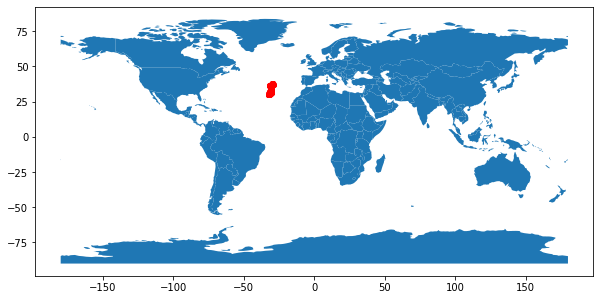

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

xx=np.array(aaa)
xxx=pd.DataFrame({'Longitude': xx[:, 0], 'Latitude': xx[:, 1]})

geometry = [Point(xy) for xy in zip(xxx['Longitude'], xxx['Latitude'])]
gdf = GeoDataFrame(xxx, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

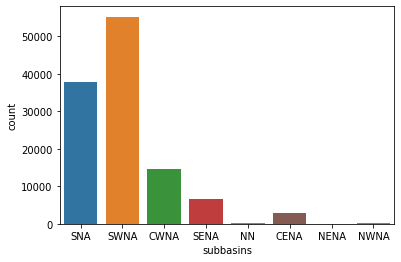

In [ ]:
sns.countplot(x="subbasins",data=atlanticData)

Most of the storms are happening is SWNA - South Western basin

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


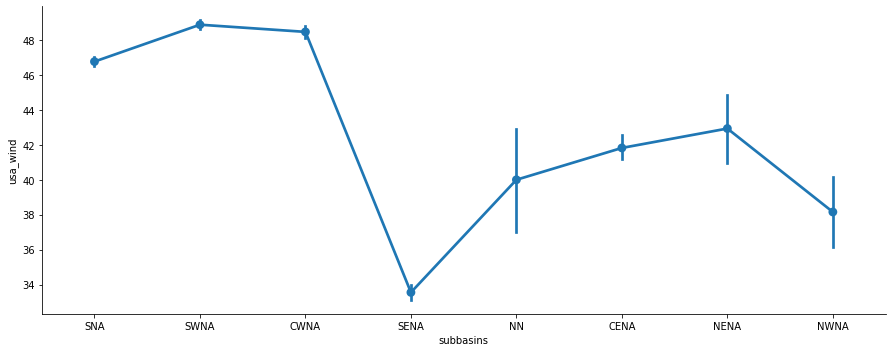

In [ ]:
axes = sns.factorplot('subbasins','usa_wind', 
                      data=atlanticData, aspect = 2.5, );

It is noticable that there is correlation between subbasins and wind strength. The strongest winds are happening in SNA, SWNA and CWNA subbasins, while SENA has the weakest winds

If we extract only storm records of 4th and 5th category (records with strongests winds), We notice that SWA subbasins has the strongest winds

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


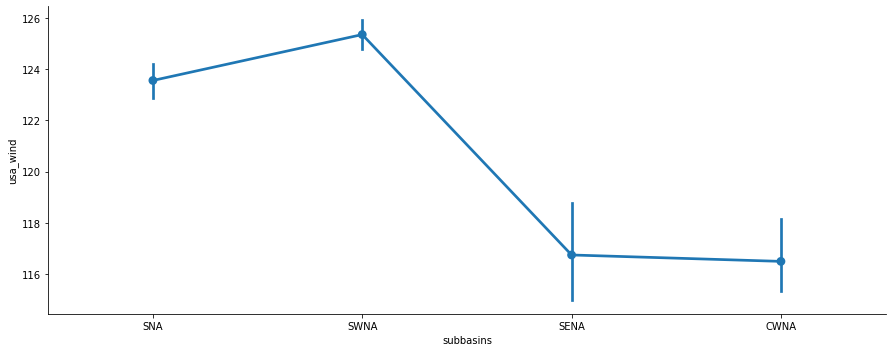

In [ ]:
axes = sns.factorplot('subbasins','usa_wind', 
                      data=atlanticData[(atlanticData["usa_sshs"]==4) | (atlanticData["usa_sshs"]==5)], aspect = 2.5, );

We gonna map subbasins

In [ ]:
atlanticData["subbasins"]=atlanticData["subbasins"].map({"SWNA":0,"SNA":1,"CWNA":2,"SENA":3,"NN":3,"CENA":4,
                                                                               "NWNA":5,"NENA":6})

In [ ]:
atlanticData.subbasins.value_counts()

0    55273
1    37960
2    14585
3     6964
4     2752
5      111
6       58
Name: subbasins, dtype: int64

In [ ]:
atlanticData=atlanticData.drop(["basin","subbasin"],axis=1)

We can use column iso_time to extract month. Column season represents the year when the storm occured.

In [ ]:
atlanticData["month"]=atlanticData["iso_time"].apply(lambda x: x[5:7])
atlanticData.month=atlanticData.month.astype(int)

In [ ]:
atlanticData.head()

,sid,season,number,iso_time,latitude,longitude,dist2land,landfall,usa_wind,usa_pressure,usa_sshs,storm_id,subbasins,month
58,2018267N33314,2018,70,2018-09-26 12:00:00 UTC,33.7468,-40.0305,1814,1719.0,57.0,986.0,0.0,13,1,9
73,2018246N22283,2018,61,2018-09-06 06:00:00 UTC,33.5131,-90.9543,0,0.0,28.0,1013.0,-1.0,7,0,9
74,2018246N22283,2018,61,2018-09-06 18:00:00 UTC,34.4372,-91.6335,0,0.0,32.0,1013.0,-1.0,7,0,9
79,2018267N33314,2018,70,2018-09-25 18:00:00 UTC,32.5512,-44.0316,1742,1717.0,32.0,1004.0,-1.0,13,1,9
82,2018267N33314,2018,70,2018-09-26 18:00:00 UTC,36.0202,-39.8998,1613,1524.0,60.0,979.0,0.0,13,2,9


In [ ]:
atlanticData.corr()

,season,number,latitude,longitude,dist2land,landfall,usa_wind,usa_pressure,usa_sshs,storm_id,subbasins,month
season,1.000000,0.688123,-0.021488,0.071612,0.050608,0.049557,0.129066,0.706078,-0.051033,0.530448,0.066185,-0.099659
number,0.688123,1.000000,-0.047818,0.104269,0.102055,0.101665,0.106878,0.447678,-0.012123,0.745490,0.071653,0.383049
latitude,-0.021488,-0.047818,1.000000,0.130395,-0.020163,-0.025279,0.057909,0.028019,-0.293031,-0.067803,0.282900,-0.002266
longitude,0.071612,0.104269,0.130395,1.000000,0.734894,0.731383,-0.096211,0.034997,-0.210638,0.065101,0.836936,0.126726
dist2land,0.050608,0.102055,-0.020163,0.734894,1.000000,0.999211,-0.073364,0.045759,-0.024447,0.075486,0.468989,0.138038
landfall,0.049557,0.101665,-0.025279,0.731383,0.999211,1.000000,-0.077402,0.045189,-0.024629,0.075293,0.463928,0.138165
usa_wind,0.129066,0.106878,0.057909,-0.096211,-0.073364,-0.077402,1.000000,0.226616,0.701774,0.172190,-0.097984,0.045631
usa_pressure,0.706078,0.447678,0.028019,0.034997,0.045759,0.045189,0.226616,1.000000,0.093730,0.365572,0.014627,-0.036747
usa_sshs,-0.051033,-0.012123,-0.293031,-0.210638,-0.024447,-0.024629,0.701774,0.093730,1.000000,0.023827,-0.293276,0.024298
storm_id,0.530448,0.745490,-0.067803,0.065101,0.075486,0.075293,0.172190,0.365572,0.023827,1.000000,0.030209,0.425772


**PRESSURE**

As we have seen, we have more than 60.000 rows with missing pressure. That means half of the pressure data is unpopulated. We gonna use Decision Tree and Random Forest in order to populate missing data.

In [ ]:
data_copy=atlanticData.copy()
unknown_copy=atlanticData.copy()

Dataset is divdided in data with and without known pressure. Data_copy stores all known valuee, while unknown_copy stores data that needs to be predicted

In [ ]:
data_copy=data_copy[data_copy["usa_pressure"]>0]
unknown_copy=unknown_copy[unknown_copy["usa_pressure"]==0]

In [ ]:
data_copy.corr()["usa_pressure"].sort_values()

usa_wind       -0.890901
usa_sshs       -0.686975
month          -0.134998
latitude       -0.099013
storm_id        0.040581
subbasins       0.078466
dist2land       0.083633
landfall        0.087225
number          0.091388
longitude       0.093723
season          0.304682
usa_pressure    1.000000
Name: usa_pressure, dtype: float64

Pressure strongly correlates with wind strengths,wind category and season.

We gonna use train_test_split to divide data for training and testing. 80 % data for training and 20 % for testing.

In [ ]:
train_set = data_copy.sample(frac=0.80, random_state=0)
test_set = data_copy.drop(train_set.index)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set=train_set.drop(["iso_time","sid"],axis=1)
x=train_set.drop(["usa_pressure"],axis=1)
y=train_set["usa_pressure"]

xx=unknown_copy.drop(["usa_pressure","iso_time","sid"],axis=1)
yy=unknown_copy["usa_pressure"]

In [ ]:
x_train,x_valid,y_train,y_valid=train_test_split(x,y,test_size=0.2,random_state=17)
x_train.shape,x_valid.shape,y_train.shape,y_valid.shape

((31116, 11), (7780, 11), (31116,), (7780,))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

Because we want to predict continuos values, we gonna use Decision Tree Regressor

In [ ]:
first_tree=DecisionTreeRegressor(random_state=15)

In [ ]:
cr_v=cross_val_score(first_tree,x_train,y_train,cv=5)
cr_v

array([0.92148291, 0.91376883, 0.91094991, 0.91575148, 0.92356127])

In [ ]:
np.mean(cr_v)

0.9171028785009658

In [ ]:
first_tree

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=15, splitter='best')

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
L=np.arange(1,11)
tree_params={'max_depth':L,'max_features':[0.5,0.7,1]}
tree_params

{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'max_features': [0.5, 0.7, 1]}

In [ ]:
tree_grid=GridSearchCV(first_tree,tree_params,cv=5,n_jobs=-1,verbose=True)

In [ ]:
%time
tree_grid.fit(x_train,y_train)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs
Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=15, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [ ]:
tree_grid.best_score_

0.897027331080718

In [ ]:
tree_grid.best_params_

{'max_depth': 10, 'max_features': 0.7}

In [ ]:
tt=test_set.drop(["usa_pressure","iso_time","sid"],axis=1)

In [ ]:
predictions=tree_grid.predict(tt)

In [ ]:
predictionList=pd.DataFrame()
predictionList["Real_Result"]=test_set["usa_pressure"]
predictionList["Predicted"]=predictions

In [ ]:
predictionList

,Real_Result,Predicted
90653,974.0,969.305556
90654,1003.0,997.144144
90656,978.0,983.544304
90929,997.0,993.328804
90967,976.0,976.000000
...,...,...
676754,1007.0,1004.094092
676757,1010.0,1004.309091
676758,1010.0,1004.309091
676768,1009.0,1008.190247


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_set.usa_pressure, predictions)

0.9050804619793512

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RC=RandomForestRegressor(n_estimators=100,max_features=10,random_state=17)

In [ ]:
RC=RC.fit(x_train,y_train)
RC

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=17, verbose=0, warm_start=False)

In [ ]:
tree_valid_RC_pred=RC.predict(tt)

In [ ]:
RC.score(tt,test_set.usa_pressure)

0.9658802551571093

In [ ]:
cr_v_RC=cross_val_score(RC,x_train,y_train,cv=5)
cr_v_RC

array([0.95734982, 0.95791557, 0.95806595, 0.95766317, 0.96013077])

In [ ]:
np.mean(cr_v_RC)

0.9582250559987793

In [ ]:
predictionList=pd.DataFrame()
predictionList["Real_Result"]=test_set["usa_pressure"]
predictionList["Predicted"]=tree_valid_RC_pred

In [ ]:
predictionList

,Real_Result,Predicted
90653,974.0,973.44
90654,1003.0,1001.09
90656,978.0,978.09
90929,997.0,997.50
90967,976.0,975.86
...,...,...
676754,1007.0,1004.72
676757,1010.0,1009.86
676758,1010.0,1009.43
676768,1009.0,1009.47


Using random forest we achieved accuracy of 96.5 %.

We are now using model to predict unknown values for pressure

In [ ]:
predictions=RC.predict(xx)

In [ ]:
unknown_copy["usa_pressure"]=predictions

In [ ]:
unknown_copy.head()

,sid,season,number,iso_time,latitude,longitude,dist2land,landfall,usa_wind,usa_pressure,usa_sshs,storm_id,subbasins,month
85290,1969277N16264,1969,96,1969-10-05 00:00:00 UTC,18.6000,-97.7000,0,0.002188,26.0,1005.01,-1.0,11,0,10
85481,1969277N16264,1969,96,1969-10-04 00:00:00 UTC,16.4000,-95.9000,0,0.000000,26.0,1004.84,-1.0,11,0,10
85824,1969277N16264,1969,96,1969-10-04 12:00:00 UTC,17.5000,-96.8000,0,0.000000,26.0,1004.96,-1.0,11,0,10
86965,1969277N16264,1969,96,1969-10-04 18:00:00 UTC,18.0253,-97.2743,0,0.000000,26.0,1004.95,-1.0,11,0,10
87543,1969277N16264,1969,96,1969-10-04 06:00:00 UTC,16.9253,-96.3244,0,0.000000,26.0,1004.92,-1.0,11,0,10


In [ ]:
data_copy = data_copy.append(unknown_copy, ignore_index = True)

In [ ]:
data_copy.head()

,sid,season,number,iso_time,latitude,longitude,dist2land,landfall,usa_wind,usa_pressure,usa_sshs,storm_id,subbasins,month
0,2018267N33314,2018,70,2018-09-26 12:00:00 UTC,33.7468,-40.0305,1814,1719.0,57.0,986.0,0.0,13,1,9
1,2018246N22283,2018,61,2018-09-06 06:00:00 UTC,33.5131,-90.9543,0,0.0,28.0,1013.0,-1.0,7,0,9
2,2018246N22283,2018,61,2018-09-06 18:00:00 UTC,34.4372,-91.6335,0,0.0,32.0,1013.0,-1.0,7,0,9
3,2018267N33314,2018,70,2018-09-25 18:00:00 UTC,32.5512,-44.0316,1742,1717.0,32.0,1004.0,-1.0,13,1,9
4,2018267N33314,2018,70,2018-09-26 18:00:00 UTC,36.0202,-39.8998,1613,1524.0,60.0,979.0,0.0,13,2,9


**Moon Phases**

**Next step is to add column Moon_phases and see if there is relation on Moon phases with storm intensity. Moon phase will contain phase of the moon when the storm occured and position of the moon**

In [ ]:
import math, decimal, datetime
dec = decimal.Decimal

In [ ]:
def position(now=None): 
   if now is None: 
      now = datetime.datetime.now()

   diff = now - datetime.datetime(2001, 1, 1)
   days = dec(diff.days) + (dec(diff.seconds) / dec(86400))
   lunations = dec("0.20439731") + (days * dec("0.03386319269"))

   return lunations % dec(1)

def phase(pos): 
   index = (pos * dec(8)) + dec("0.5")
   index = math.floor(index)
   return {
      0: "New Moon", 
      1: "Waxing Crescent", 
      2: "First Quarter", 
      3: "Waxing Gibbous", 
      4: "Full Moon", 
      5: "Waning Gibbous", 
      6: "Last Quarter", 
      7: "Waning Crescent"
   }[int(index) & 7]

For each row in hurricane dataset, we used UTC datetime and pass it into function "position" to find the position of the moon for that day and based on the position determine the Moon phase

In [ ]:
d=[]
dd=[]
for index,row in data_copy.iterrows():
  pos = position(datetime.datetime(int(row.iso_time[:4]), int(row.iso_time[5:7]), int(row.iso_time[8:10]),int(row.iso_time[11:13]),int(row.iso_time[14:16]),int(row.iso_time[17:19])))
  phasename = phase(pos)
  roundedpos = round(float(pos), 3)
  d.append(phasename)
  dd.append(roundedpos)

In [ ]:
data_copy["Moon_phase"]=d

In [ ]:
data_copy["Moon_phase"]=data_copy["Moon_phase"].map({"New Moon":0,"Waxing Crescent":1,"First Quarter":2,"Waxing Gibbous":3,
                                                               "Full Moon":4,"Waning Gibbous":5,"Last Quarter":6,"Waning Crescent":7})

In [ ]:
data_copy.head()

,sid,season,number,iso_time,latitude,longitude,dist2land,landfall,usa_wind,usa_pressure,usa_sshs,storm_id,subbasins,month,Moon_phase
0,2018267N33314,2018,70,2018-09-26 12:00:00 UTC,33.7468,-40.0305,1814,1719.0,57.0,986.0,0.0,13,1,9,4
1,2018246N22283,2018,61,2018-09-06 06:00:00 UTC,33.5131,-90.9543,0,0.0,28.0,1013.0,-1.0,7,0,9,7
2,2018246N22283,2018,61,2018-09-06 18:00:00 UTC,34.4372,-91.6335,0,0.0,32.0,1013.0,-1.0,7,0,9,7
3,2018267N33314,2018,70,2018-09-25 18:00:00 UTC,32.5512,-44.0316,1742,1717.0,32.0,1004.0,-1.0,13,1,9,4
4,2018267N33314,2018,70,2018-09-26 18:00:00 UTC,36.0202,-39.8998,1613,1524.0,60.0,979.0,0.0,13,2,9,4


In [ ]:
data_copy.Moon_phase.unique()

array([4, 7, 2, 1, 6, 0, 5, 3])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


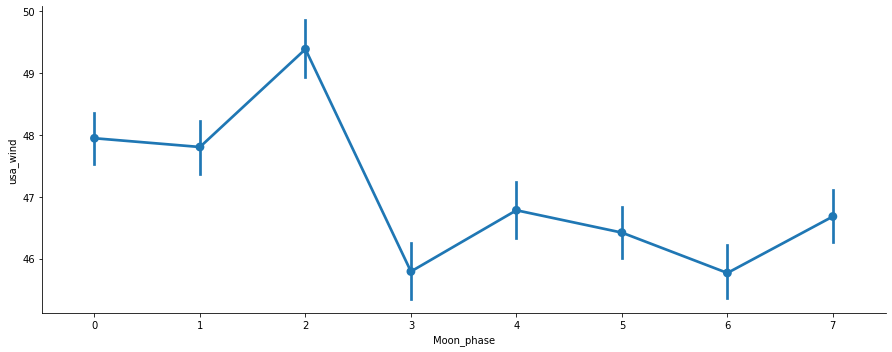

In [ ]:
axes = sns.factorplot('Moon_phase','usa_wind', 
                      data=data_copy, aspect = 2.5, );

From the graph above, it is noticable that wind intensity is getting higher during the new moon and waxing cresent and reaches it's peek in the first quarter. Afterwards, wind intensity is getting lower when reaching phase of Waxing Gibbous

To get better visualization, I am going to seperate storms 5th category.

In [ ]:
newData=data_copy[data_copy["usa_sshs"]==5]

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


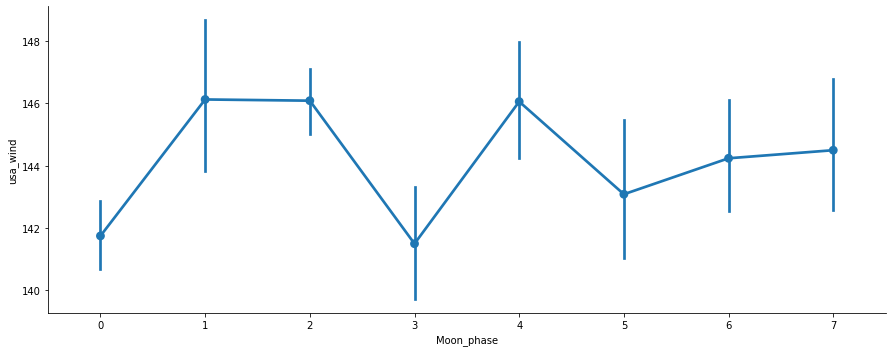

In [ ]:
axes = sns.factorplot('Moon_phase','usa_wind', 
                      data=newData, aspect = 2.5, );

Seperating the highest wind, we can see that highest wind occure between new and full moon.

In [ ]:
data_copy.to_csv("/content/drive/My Drive/final_work/final_dataset.csv",index=False)

## **RECURRENT NEURAL NETWORK - MULTIVARIATE LSTM**

This work uses multivariate LSTMs to predict rapid intensification by modelling time series of hurricane strength as a regression task. The model will be trained on past hurricane data tracked every 3 hours and with first 12 hours of current storm. In  one approach model will use latitude, longitude, air pressure and wind strength to predict the wind  strength and path for storms. Model will be tested on 4 different storms and predicted wind values will be presented using confusion matrix. Second approach will add additional features in model, including moon phases, and will compare values with previous approach

**1st APPROACH**

**1st test storm**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as path
import seaborn as sns

In [2]:
my_data=pd.read_csv("/content/drive/My Drive/final_work/final_dataset.csv",low_memory=False)

First step is to sort our data. We don't want to sort our data just by time as it is quite possible that two hurricanes can be created at the same time in different areas of atlantic ocean. For that reason we gonna sort our dataset by SID and iso_time

In [6]:
my_data=my_data.sort_values(by=["sid","iso_time"])

In [7]:
my_data["wind"]=my_data["usa_wind"]
my_data=my_data.drop(["usa_wind","usa_sshs"],axis=1)

In [8]:
my_data.head()

,sid,season,number,iso_time,storm_id,month,Moon_phase,latitude,longitude,dist2land,landfall,subbasins,usa_pressure,wind
53523,1851175N26270,1851,5,1851-06-23 12:00:00 UTC,1,6,7,26.1000,-90.4000,335,323.0,0,973.51,15.7
61957,1851175N26270,1851,5,1851-06-23 15:00:00 UTC,1,6,7,26.2001,-90.6999,323,312.0,0,974.74,27.2
55023,1851175N26270,1851,5,1851-06-23 18:00:00 UTC,1,6,7,26.3000,-91.0000,312,302.0,0,974.06,14.1
61085,1851175N26270,1851,5,1851-06-23 21:00:00 UTC,1,6,7,26.3999,-91.3001,304,296.0,0,973.34,14.3
53157,1851175N26270,1851,5,1851-06-24 00:00:00 UTC,1,6,7,26.5000,-91.6000,298,292.0,0,973.89,26.3


In dataset, we have storms that lasted for a very short time. Those storms won't be relevant for our research, as they couldn't reach rapid intensification in short time. 

In [9]:
vc=my_data["sid"].value_counts()
u  = [i not in set(vc[vc<=7].index) for i in my_data["sid"]]
my_data = my_data[u]

The first approach uses latitude, longitude, pressure and wind strength. The rest of the features will be deleted. Those features will be used in later research.

In [10]:
my_data=my_data.drop(["season"],axis=1)
my_data=my_data.drop(["number"],axis=1)
my_data=my_data.drop(["iso_time"],axis=1)
my_data=my_data.drop(["storm_id"],axis=1)
my_data=my_data.drop(["month"],axis=1)
my_data=my_data.drop(["Moon_phase"],axis=1)
my_data=my_data.drop(["landfall"],axis=1)
my_data=my_data.drop(["dist2land"],axis=1)
my_data=my_data.drop(["subbasins"],axis=1)

#**TRAIN AND TEST SPLIT**

For storm that is being predicted, model will be retrained on 80 % of historial storms + first 12 hours data of current storm and validated on 20 % of storms. 

Line below calculates total number of storms in dataset

In [12]:
uniqueIDs=my_data.sid.nunique()
uniqueIDs

2172

First 20 % of storms is taken for validation. The rest is put in training

In [14]:
limiter=int((uniqueIDs *20)/100)
limiter

434

In [15]:
dd=my_data.sid.unique()

In [16]:
dd[limiter]

'1883228N16309'

In [17]:
my_data[my_data["sid"]>dd[limiter]]

,sid,latitude,longitude,usa_pressure,wind
104363,1883230N19312,19.2000,-48.5000,992.99,40.0
110556,1883230N19312,19.3125,-48.9523,993.05,40.0
103474,1883230N19312,19.4000,-49.5000,993.07,40.0
109873,1883230N19312,19.4500,-50.2052,994.05,40.0
102949,1883230N19312,19.5000,-51.0000,993.95,40.0
...,...,...,...,...,...
118,2018300N26315,33.1000,-54.5000,982.00,64.0
597,2018300N26315,34.1532,-53.4807,981.00,64.0
208,2018300N26315,35.4000,-52.4000,980.00,64.0
538,2018300N26315,36.6953,-51.4194,978.00,64.0


In [18]:
validation_data=my_data[my_data["sid"]<dd[limiter]]
train_data=my_data[my_data["sid"]>=dd[limiter]]

In [19]:
train_data.set_index("sid",inplace=True)
validation_data.set_index("sid",inplace=True)

From training dataset, we are seperating last storm and taking it for testing.

In [20]:
rowNumber=train_data[train_data.index==train_data.tail(1).index[0]].count()
rowNumber[0]
number=rowNumber[0]-4

In [22]:
test_data=train_data.tail(number)
train_data=train_data[:-number]

# **NORMALIZING THE DATA**

In [23]:
from sklearn.preprocessing import MinMaxScaler

Fitting the data is done on training set. Fitting on testing set is not recommended as we dont want to assume prior knowledge of the test data 

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

Both training and validation datasets are then transformed

In [25]:
scaled_train=scaler.transform(train_data)
scaled_test=scaler.transform(validation_data)

After the data is scaled, we can start building our first model

# **MODEL**

One way of dealing with sequence data that are sorted in chronological order is to use TimeSeriesGenerator

TimeSeriesGenerator for the first parameter takes consecutive data points (timesteps) that represent input data. Second parameter are points that are being predicted. First and Second parameter should have the same lenght. Parameter length represents number of timesteps.

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
scaled_train

array([[0.12400912, 0.42288233, 0.79183099, 0.09634146],
       [0.12810006, 0.42000212, 0.79112676, 0.18231707],
       [0.13218554, 0.41711903, 0.79330986, 0.02073171],
       ...,
       [0.26775886, 0.4580111 , 0.84507042, 0.24390244],
       [0.27254752, 0.45386008, 0.82394366, 0.24390244],
       [0.27480012, 0.45018021, 0.81690141, 0.27439024]])

First 5 columns from scaled_train are input data in TimeSeriesGenerator and last 5 columns are output data.

lenght represents the length of the output sequences.(in number of timesteps)


In [28]:
length=len(scaled_train)-120
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

We can define our model. We are using Sequential model as we are working with time series data. The model will have one LSTM layer and one Dense layer.LSTM has attribute input shape that has two attributes. One is length of batch and other one is number of features we are considering for prediction. Dense layer's neurons have to match the number of features.

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,LSTM

In [30]:
scaled_train.shape

(95621, 4)

In [31]:
model=Sequential()
model.add(LSTM(25,input_shape=(length,scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer="adam",loss="mse")

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 25)                3000      
_________________________________________________________________
dense (Dense)                (None, 4)                 104       
Total params: 3,104
Trainable params: 3,104
Non-trainable params: 0
_________________________________________________________________


In [33]:
length2=len(scaled_test)-120
length2

21769

We implemented Early Stopping and used TimesSeriesGenerator for validation data. 

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=3)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=30,batch_size=batch_size)

In [35]:
model.fit_generator(generator,epochs=15,validation_data=validation_generator,callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
120/120 [==============================] - 323s 3s/step - loss: 0.0375 - val_loss: 0.0160
Epoch 2/15
120/120 [==============================] - 321s 3s/step - loss: 0.0118 - val_loss: 0.0124
Epoch 3/15
120/120 [==============================] - 322s 3s/step - loss: 0.0097 - val_loss: 0.0111
Epoch 4/15
120/120 [==============================] - 322s 3s/step - loss: 0.0083 - val_loss: 0.0093
Epoch 5/15
120/120 [==============================] - 321s 3s/step - loss: 0.0069 - val_loss: 0.0092
Epoch 6/15
120/120 [==============================] - 321s 3s/step - loss: 0.0062 - val_loss: 0.0090
Epoch 7/15
120/120 [==============================] - 321s 3s/step - loss: 0.0058 - val_loss: 0.0074
Epoch 8/15
120/120 [==============================] - 321s 3s/step - loss: 0.0052 - val_loss: 0.0093
Epoch 9/15
120/120 [==============================] - 319s 3s/step - loss: 0.0047 - val_loss: 0.0089
Epoch 10/15
120

In [36]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

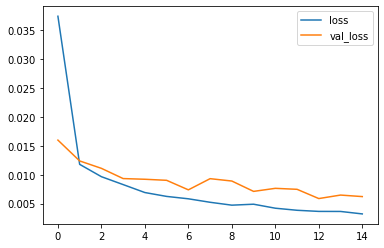

In [37]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [38]:
n_features=scaled_train.shape[1]
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test_data)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [39]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions=pd.DataFrame(data=true_predictions,columns=test_data.columns)
true_predictions

,latitude,longitude,usa_pressure,wind
0,26.794566,-48.888074,995.434914,43.066402
1,27.491780,-50.876719,994.319682,44.148800
2,28.250020,-52.881589,992.870872,45.515485
3,29.004081,-54.842277,991.295774,47.043187
4,29.737700,-56.745082,989.617729,48.714275
5,30.443283,-58.579804,987.860065,50.522133
6,31.114881,-60.336256,986.044753,52.455836
7,31.747717,-62.005227,984.192488,54.500726
8,32.338319,-63.578918,982.322838,56.638935
9,32.884539,-65.051037,980.454611,58.849749


In [40]:
test_data

,latitude,longitude,usa_pressure,wind
sid,,,,
2018300N26315,27.4000,-47.7000,997.0,51.0
2018300N26315,27.3342,-48.7775,996.0,51.0
2018300N26315,27.1000,-49.9000,995.0,51.0
2018300N26315,26.6870,-50.7708,995.0,51.0
2018300N26315,26.2000,-51.4000,995.0,51.0
2018300N26315,25.7315,-51.7218,994.0,52.0
2018300N26315,25.4000,-52.0000,994.0,54.0
2018300N26315,25.3173,-52.5249,994.0,54.0
2018300N26315,25.4000,-53.2000,994.0,54.0


In [41]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_data.wind, true_predictions.wind)

0.7383283480055005

In [42]:
temp=test_data.wind
temp=temp.reset_index()
merged_dataset=pd.concat([temp.wind, true_predictions.wind], axis=1)
merged_dataset.columns = ['real_values', 'predicted_values']

In [43]:
merged_dataset

,real_values,predicted_values
0,51.0,43.066402
1,51.0,44.148800
2,51.0,45.515485
3,51.0,47.043187
4,51.0,48.714275
5,52.0,50.522133
6,54.0,52.455836
7,54.0,54.500726
8,54.0,56.638935
9,59.0,58.849749


In [44]:
merged_dataset.to_csv("/content/drive/My Drive/final_work/storm_results/storm1.csv",index=False)

The process is repeated for the next 3 storms

**2nd storm**

In [115]:
my_data=my_data[my_data.sid != my_data['sid'].iloc[-1]]

In [137]:
uniqueIDs=my_data.sid.nunique()
limiter=int((uniqueIDs *20)/100)

In [138]:
validation_data=my_data[my_data["sid"]<dd[limiter]]
train_data=my_data[my_data["sid"]>=dd[limiter]]

In [139]:
train_data.set_index("sid",inplace=True)
validation_data.set_index("sid",inplace=True)

In [140]:
rowNumber=train_data[train_data.index==train_data.tail(1).index[0]].count()
rowNumber[0]
number=rowNumber[0]-4

In [141]:
test_data=train_data.tail(number)
train_data=train_data[:-number]

# **NORMALIZING THE DATA**

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [144]:
scaled_train=scaler.transform(train_data)
scaled_test=scaler.transform(validation_data)

# **MODEL**

In [145]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [146]:
scaled_train

array([[0.12400912, 0.42288233, 0.79183099, 0.09634146],
       [0.12810006, 0.42000212, 0.79112676, 0.18231707],
       [0.13218554, 0.41711903, 0.79330986, 0.02073171],
       ...,
       [0.04466372, 0.5727282 , 0.87323944, 0.20731707],
       [0.04769582, 0.57056696, 0.86619718, 0.20731707],
       [0.05168182, 0.56849649, 0.85915493, 0.22560976]])

In [147]:
length=len(scaled_train)-120
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,LSTM

In [149]:
scaled_train.shape

(95592, 4)

In [150]:
model=Sequential()
model.add(LSTM(25,input_shape=(length,scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer="adam",loss="mse")

In [151]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 25)                3000      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 104       
Total params: 3,104
Trainable params: 3,104
Non-trainable params: 0
_________________________________________________________________


In [152]:
length2=len(scaled_test)-120
length2

21769

In [153]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=3)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=30,batch_size=batch_size)

In [154]:
model.fit_generator(generator,epochs=15,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/15
120/120 [==============================] - 323s 3s/step - loss: 0.0508 - val_loss: 0.0182
Epoch 2/15
120/120 [==============================] - 324s 3s/step - loss: 0.0109 - val_loss: 0.0112
Epoch 3/15
120/120 [==============================] - 323s 3s/step - loss: 0.0090 - val_loss: 0.0097
Epoch 4/15
120/120 [==============================] - 322s 3s/step - loss: 0.0075 - val_loss: 0.0094
Epoch 5/15
120/120 [==============================] - 324s 3s/step - loss: 0.0061 - val_loss: 0.0106
Epoch 6/15
120/120 [==============================] - 324s 3s/step - loss: 0.0053 - val_loss: 0.0082
Epoch 7/15
120/120 [==============================] - 324s 3s/step - loss: 0.0048 - val_loss: 0.0100
Epoch 8/15
120/120 [==============================] - 323s 3s/step - loss: 0.0042 - val_loss: 0.0103
Epoch 9/15
120/120 [==============================] - 322s 3s/step - loss: 0.0039 - val_loss: 0.0070
Epoch 10/15
120/120 [==============================] - 323s 3s/step - loss: 0.0036 - val_lo

In [155]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

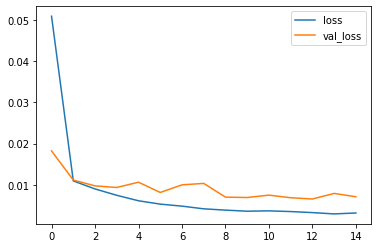

In [156]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [157]:
n_features=scaled_train.shape[1]
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test_data)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [158]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions=pd.DataFrame(data=true_predictions,columns=test_data.columns)
true_predictions

,latitude,longitude,usa_pressure,wind
0,12.841248,-42.702353,1002.252214,45.059137
1,12.246879,-45.210469,1002.154804,47.674261
2,11.662776,-47.458585,1001.594310,50.350075
3,11.291981,-49.865134,1000.562980,53.047384
4,11.117377,-52.409290,999.162152,55.780803
5,11.109608,-55.036042,997.468069,58.565576
6,11.240571,-57.689122,995.534635,61.411555
7,11.484651,-60.314881,993.399542,64.326391
8,11.819275,-62.863671,991.089721,67.317214
9,12.225206,-65.290606,988.625299,70.390594


In [159]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_data.wind, true_predictions.wind)

-13.634605328053423

In [160]:
temp=test_data.wind
temp=temp.reset_index()
merged_dataset2=pd.concat([temp.wind, true_predictions.wind], axis=1)
merged_dataset2.columns = ['real_values', 'predicted_values']

In [161]:
merged_dataset2

,real_values,predicted_values
0,41.0,45.059137
1,43.0,47.674261
2,45.0,50.350075
3,49.0,53.047384
4,54.0,55.780803
5,54.0,58.565576
6,54.0,61.411555
7,54.0,64.326391
8,54.0,67.317214
9,54.0,70.390594


In [162]:
merged_dataset2.to_csv("/content/drive/My Drive/final_work/storm_results/storm2.csv",index=False)

**3rd storm**

In [165]:
my_data=my_data[my_data.sid != my_data['sid'].iloc[-1]]

In [167]:
uniqueIDs=my_data.sid.nunique()
limiter=int((uniqueIDs *20)/100)

In [168]:
validation_data=my_data[my_data["sid"]<dd[limiter]]
train_data=my_data[my_data["sid"]>=dd[limiter]]

In [169]:
train_data.set_index("sid",inplace=True)
validation_data.set_index("sid",inplace=True)

In [170]:
rowNumber=train_data[train_data.index==train_data.tail(1).index[0]].count()
rowNumber[0]
number=rowNumber[0]-4

In [171]:
test_data=train_data.tail(number)
train_data=train_data[:-number]

# **NORMALIZING THE DATA**

In [173]:
from sklearn.preprocessing import MinMaxScaler

In [174]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [175]:
scaled_train=scaler.transform(train_data)
scaled_test=scaler.transform(validation_data)

# **MODEL**

In [176]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [177]:
scaled_train

array([[0.12400912, 0.42288233, 0.79183099, 0.09634146],
       [0.12810006, 0.42000212, 0.79112676, 0.18231707],
       [0.13218554, 0.41711903, 0.79330986, 0.02073171],
       ...,
       [0.15211694, 0.16326284, 0.85915493, 0.15853659],
       [0.15262661, 0.16209289, 0.85915493, 0.17073171],
       [0.15671346, 0.16191206, 0.85915493, 0.17073171]])

In [178]:
length=len(scaled_train)-120
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,LSTM

In [180]:
scaled_train.shape

(95549, 4)

In [181]:
model=Sequential()
model.add(LSTM(25,input_shape=(length,scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer="adam",loss="mse")

In [182]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 25)                3000      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 104       
Total params: 3,104
Trainable params: 3,104
Non-trainable params: 0
_________________________________________________________________


In [183]:
length2=len(scaled_test)-120
length2

21769

In [184]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=3)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=30,batch_size=batch_size)

In [185]:
model.fit_generator(generator,epochs=15,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/15
120/120 [==============================] - 323s 3s/step - loss: 0.0294 - val_loss: 0.0217
Epoch 2/15
120/120 [==============================] - 323s 3s/step - loss: 0.0040 - val_loss: 0.0169
Epoch 3/15
120/120 [==============================] - 323s 3s/step - loss: 0.0037 - val_loss: 0.0180
Epoch 4/15
120/120 [==============================] - 325s 3s/step - loss: 0.0033 - val_loss: 0.0137
Epoch 5/15
120/120 [==============================] - 324s 3s/step - loss: 0.0032 - val_loss: 0.0158
Epoch 6/15
120/120 [==============================] - 315s 3s/step - loss: 0.0029 - val_loss: 0.0144
Epoch 7/15
120/120 [==============================] - 314s 3s/step - loss: 0.0028 - val_loss: 0.0122
Epoch 8/15
120/120 [==============================] - 312s 3s/step - loss: 0.0025 - val_loss: 0.0121
Epoch 9/15
120/120 [==============================] - 313s 3s/step - loss: 0.0024 - val_loss: 0.0112
Epoch 10/15
120/120 [==============================] - 312s 3s/step - loss: 0.0023 - val_lo

In [186]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

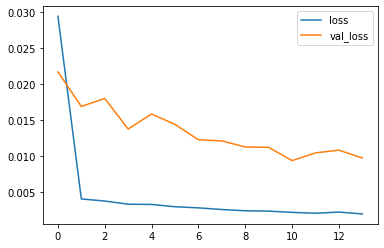

In [187]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [188]:
n_features=scaled_train.shape[1]
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test_data)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [189]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions=pd.DataFrame(data=true_predictions,columns=test_data.columns)
true_predictions

,latitude,longitude,usa_pressure,wind
0,30.187658,-62.965185,996.563274,51.857884
1,31.764043,-59.461943,994.179301,54.646679
2,32.421274,-57.187033,991.980034,56.828666
3,32.713551,-55.401772,990.023435,58.657496
4,32.781517,-54.012923,988.333567,60.144215
5,32.719517,-52.949880,986.911528,61.315607
6,32.590658,-52.145355,985.743482,62.202063
7,32.436751,-51.540057,984.808081,62.834232
8,32.284678,-51.084455,984.081019,63.241632
9,32.150865,-50.738772,983.537715,63.452150


In [190]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_data.wind, true_predictions.wind)

0.042342265007387914

In [191]:
temp=test_data.wind
temp=temp.reset_index()
merged_dataset3=pd.concat([temp.wind, true_predictions.wind], axis=1)
merged_dataset3.columns = ['real_values', 'predicted_values']

In [193]:
merged_dataset3

,real_values,predicted_values
0,29.0,51.857884
1,35.0,54.646679
2,41.0,56.828666
3,46.0,58.657496
4,51.0,60.144215
5,52.0,61.315607
6,54.0,62.202063
7,59.0,62.834232
8,64.0,63.241632
9,67.0,63.452150


In [194]:
merged_dataset3.to_csv("/content/drive/My Drive/final_work/storm_results/storm3.csv",index=False)

**4th storm**

In [196]:
my_data=my_data[my_data.sid != my_data['sid'].iloc[-1]]

In [198]:
uniqueIDs=my_data.sid.nunique()
limiter=int((uniqueIDs *20)/100)

In [199]:
validation_data=my_data[my_data["sid"]<dd[limiter]]
train_data=my_data[my_data["sid"]>=dd[limiter]]

In [200]:
train_data.set_index("sid",inplace=True)
validation_data.set_index("sid",inplace=True)

In [201]:
rowNumber=train_data[train_data.index==train_data.tail(1).index[0]].count()
rowNumber[0]
number=rowNumber[0]-4

In [202]:
test_data=train_data.tail(number)
train_data=train_data[:-number]

# **NORMALIZING THE DATA**

In [203]:
from sklearn.preprocessing import MinMaxScaler

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [205]:
scaled_train=scaler.transform(train_data)
scaled_test=scaler.transform(validation_data)

# **MODEL**

In [206]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [207]:
scaled_train

array([[0.16761672, 0.44305389, 0.78901408, 0.01280488],
       [0.1759376 , 0.4382898 , 0.78852113, 0.07134146],
       [0.18396957, 0.43368852, 0.79028169, 0.05914634],
       ...,
       [0.35618008, 0.45355751, 0.84507042, 0.20731707],
       [0.35839998, 0.45025802, 0.84507042, 0.20731707],
       [0.35875021, 0.44577201, 0.85211268, 0.20731707]])

In [208]:
length=len(scaled_train)-120
batch_size=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,LSTM

In [210]:
scaled_train.shape

(95425, 4)

In [211]:
model=Sequential()
model.add(LSTM(25,input_shape=(length,scaled_train.shape[1])))
model.add(Dense(scaled_train.shape[1]))
model.compile(optimizer="adam",loss="mse")

In [212]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 25)                3000      
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 104       
Total params: 3,104
Trainable params: 3,104
Non-trainable params: 0
_________________________________________________________________


In [213]:
length2=len(scaled_test)-120
length2

21736

In [214]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=3)
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=30,batch_size=batch_size)

In [215]:
model.fit_generator(generator,epochs=15,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/15
120/120 [==============================] - 312s 3s/step - loss: 0.0364 - val_loss: 0.0201
Epoch 2/15
120/120 [==============================] - 312s 3s/step - loss: 0.0054 - val_loss: 0.0165
Epoch 3/15
120/120 [==============================] - 313s 3s/step - loss: 0.0039 - val_loss: 0.0143
Epoch 4/15
120/120 [==============================] - 317s 3s/step - loss: 0.0032 - val_loss: 0.0131
Epoch 5/15
120/120 [==============================] - 314s 3s/step - loss: 0.0027 - val_loss: 0.0130
Epoch 6/15
120/120 [==============================] - 317s 3s/step - loss: 0.0024 - val_loss: 0.0147
Epoch 7/15
120/120 [==============================] - 320s 3s/step - loss: 0.0021 - val_loss: 0.0134
Epoch 8/15
120/120 [==============================] - 318s 3s/step - loss: 0.0020 - val_loss: 0.0120
Epoch 9/15
120/120 [==============================] - 305s 3s/step - loss: 0.0019 - val_loss: 0.0145
Epoch 10/15
120/120 [==============================] - 303s 3s/step - loss: 0.0018 - val_lo

In [216]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

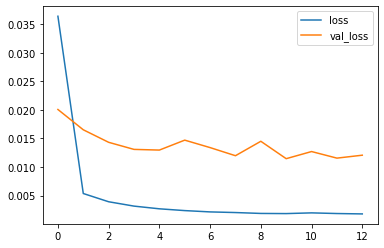

In [217]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [218]:
n_features=scaled_train.shape[1]
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))

for i in range(len(test_data)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [219]:
true_predictions=scaler.inverse_transform(test_predictions)
true_predictions=pd.DataFrame(data=true_predictions,columns=test_data.columns)
true_predictions

,latitude,longitude,usa_pressure,wind
0,31.397948,-42.007741,1003.833729,38.294322
1,32.266478,-41.217302,1003.432779,38.587315
2,33.195676,-40.556442,1003.116552,38.650394
3,34.048965,-39.940880,1002.874173,38.562716
4,34.820438,-39.347840,1002.690795,38.358413
...,...,...,...,...
148,21.611367,-34.896758,1005.985377,32.197460
149,21.612139,-34.856498,1005.997125,32.163638
150,21.608747,-34.818472,1006.008509,32.131119
151,21.601337,-34.782688,1006.019521,32.099956


In [220]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_data.wind, true_predictions.wind)

-0.1142191656411411

In [221]:
temp=test_data.wind
temp=temp.reset_index()
merged_dataset4=pd.concat([temp.wind, true_predictions.wind], axis=1)
merged_dataset4.columns = ['real_values', 'predicted_values']

In [222]:
merged_dataset4

,real_values,predicted_values
0,35.0,38.294322
1,35.0,38.587315
2,35.0,38.650394
3,35.0,38.562716
4,35.0,38.358413
...,...,...
148,76.0,32.197460
149,76.0,32.163638
150,76.0,32.131119
151,73.0,32.099956


In [223]:
merged_dataset4.to_csv("/content/drive/My Drive/final_work/storm_results/storm4.csv",index=False)

**Result comparison**

For each test storm,real and predicted wind strength values were used to determine increase in wind for 24 hours. That is followed by turning results into classification problem that states if the rapid intensification happened or didn't happen. For each storm, results are presented in confusion matrix

In [2]:
xx=pd.read_csv("/content/drive/My Drive/final_work/storm_results/storm1.csv",low_memory=False)

In [20]:
results_real_values=[]
for index,row in xx.iterrows():
  if index==0:
    results_real_values.append(0)
  elif index<8:
    data1=xx[:index+1].real_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_real_values.append(v)
  else:
    data1=xx[index-7:index+1].real_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_real_values.append(v)


In [31]:
results_pred_values=[]
for index,row in xx.iterrows():
  if index==0:
    results_pred_values.append(0)
  elif index<8:
    data1=xx[:index+1].predicted_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_pred_values.append(v)
  else:
    data1=xx[index-7:index+1].predicted_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_pred_values.append(v)

In [32]:
result_ri=pd.concat([pd.DataFrame(results_real_values,columns=["real_values"]),pd.DataFrame(results_pred_values,columns=["pred_values"])], axis=1)

In [34]:
def pred_func(row,column):
   if row[column] >= 10 :
      return 'True'
   return 'False'

In [35]:
result_ri['real_classification'] = result_ri.apply (lambda row: pred_func(row,"real_values"), axis=1)
result_ri['predicted_classification'] = result_ri.apply (lambda row: pred_func(row,"pred_values"), axis=1)
result_ri

,real_values,pred_values,real_classification,predicted_classification
0,0.0,0.000000,False,False
1,0.0,1.082399,False,False
2,0.0,2.449084,False,False
3,0.0,3.976785,False,False
4,0.0,5.647873,False,False
5,1.0,7.455731,False,False
6,3.0,9.389434,False,False
7,3.0,11.434324,False,True
8,3.0,12.490135,False,True
9,8.0,13.334264,False,True


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result_ri.real_classification, result_ri.predicted_classification)

array([[ 9,  3],
       [11, 12]])

In [37]:
xx=pd.read_csv("/content/drive/My Drive/final_work/storm_results/storm2.csv",low_memory=False)

In [38]:
results_real_values=[]
for index,row in xx.iterrows():
  if index==0:
    results_real_values.append(0)
  elif index<8:
    data1=xx[:index+1].real_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_real_values.append(v)
  else:
    data1=xx[index-7:index+1].real_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_real_values.append(v)


In [39]:
results_pred_values=[]
for index,row in xx.iterrows():
  if index==0:
    results_pred_values.append(0)
  elif index<8:
    data1=xx[:index+1].predicted_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_pred_values.append(v)
  else:
    data1=xx[index-7:index+1].predicted_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_pred_values.append(v)

In [40]:
result_ri=pd.concat([pd.DataFrame(results_real_values,columns=["real_values"]),pd.DataFrame(results_pred_values,columns=["pred_values"])], axis=1)

In [41]:
def pred_func(row,column):
   if row[column] >= 10 :
      return 'True'
   return 'False'

In [42]:
result_ri['real_classification'] = result_ri.apply (lambda row: pred_func(row,"real_values"), axis=1)
result_ri['predicted_classification'] = result_ri.apply (lambda row: pred_func(row,"pred_values"), axis=1)
result_ri

,real_values,pred_values,real_classification,predicted_classification
0,0.0,0.000000,False,False
1,2.0,2.615125,False,False
2,4.0,5.290938,False,False
3,8.0,7.988248,False,False
4,13.0,10.721666,True,True
5,13.0,13.506439,True,True
6,13.0,16.352418,True,True
7,13.0,19.267254,True,True
8,11.0,19.642953,True,True
9,9.0,20.040519,False,True


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result_ri.real_classification, result_ri.predicted_classification)

array([[ 4, 13],
       [ 0,  8]])

In [44]:
xx=pd.read_csv("/content/drive/My Drive/final_work/storm_results/storm3.csv",low_memory=False)

In [45]:
results_real_values=[]
for index,row in xx.iterrows():
  if index==0:
    results_real_values.append(0)
  elif index<8:
    data1=xx[:index+1].real_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_real_values.append(v)
  else:
    data1=xx[index-7:index+1].real_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_real_values.append(v)


In [46]:
results_pred_values=[]
for index,row in xx.iterrows():
  if index==0:
    results_pred_values.append(0)
  elif index<8:
    data1=xx[:index+1].predicted_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_pred_values.append(v)
  else:
    data1=xx[index-7:index+1].predicted_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_pred_values.append(v)

In [47]:
result_ri=pd.concat([pd.DataFrame(results_real_values,columns=["real_values"]),pd.DataFrame(results_pred_values,columns=["pred_values"])], axis=1)

In [48]:
def pred_func(row,column):
   if row[column] >= 10 :
      return 'True'
   return 'False'

In [49]:
result_ri['real_classification'] = result_ri.apply (lambda row: pred_func(row,"real_values"), axis=1)
result_ri['predicted_classification'] = result_ri.apply (lambda row: pred_func(row,"pred_values"), axis=1)
result_ri

,real_values,pred_values,real_classification,predicted_classification
0,0.0,0.000000,False,False
1,6.0,2.788795,False,False
2,12.0,4.970782,True,False
3,17.0,6.799612,True,False
4,22.0,8.286331,True,False
5,23.0,9.457723,True,False
6,25.0,10.344179,True,True
7,30.0,10.976348,True,True
8,29.0,8.594953,True,False
9,26.0,6.623483,True,False


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result_ri.real_classification, result_ri.predicted_classification)

array([[ 4,  0],
       [33,  2]])

In [51]:
xx=pd.read_csv("/content/drive/My Drive/final_work/storm_results/storm4.csv",low_memory=False)

In [52]:
results_real_values=[]
for index,row in xx.iterrows():
  if index==0:
    results_real_values.append(0)
  elif index<8:
    data1=xx[:index+1].real_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_real_values.append(v)
  else:
    data1=xx[index-7:index+1].real_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_real_values.append(v)


In [53]:
results_pred_values=[]
for index,row in xx.iterrows():
  if index==0:
    results_pred_values.append(0)
  elif index<8:
    data1=xx[:index+1].predicted_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_pred_values.append(v)
  else:
    data1=xx[index-7:index+1].predicted_values
    min=data1.min()
    max=data1.max()
    v=max-min
    results_pred_values.append(v)

In [54]:
result_ri=pd.concat([pd.DataFrame(results_real_values,columns=["real_values"]),pd.DataFrame(results_pred_values,columns=["pred_values"])], axis=1)

In [55]:
def pred_func(row,column):
   if row[column] >= 10 :
      return 'True'
   return 'False'

In [56]:
result_ri['real_classification'] = result_ri.apply (lambda row: pred_func(row,"real_values"), axis=1)
result_ri['predicted_classification'] = result_ri.apply (lambda row: pred_func(row,"pred_values"), axis=1)
result_ri

,real_values,pred_values,real_classification,predicted_classification
0,0.0,0.000000,False,False
1,0.0,0.292993,False,False
2,0.0,0.356072,False,False
3,0.0,0.356072,False,False
4,0.0,0.356072,False,False
...,...,...,...,...
148,7.0,0.269147,False,False
149,4.0,0.261449,False,False
150,4.0,0.253367,False,False
151,7.0,0.244907,False,False


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result_ri.real_classification, result_ri.predicted_classification)

array([[115,   0],
       [ 38,   0]])

As a result, we can see that this approach work well on some storms while on others model fails to generalise.

## **MULTIVARIATE LSTM - EXTRA PARAMETERS (MOON PHASE)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as path
import seaborn as sns

In [ ]:
my_data=pd.read_csv("/content/drive/My Drive/final_work/final_dataset.csv",low_memory=False)

In [ ]:
my_data.head()

,sid,season,number,iso_time,latitude,longitude,dist2land,landfall,usa_wind,usa_pressure,usa_sshs,storm_id,subbasins,month,Moon_phase
0,2018267N33314,2018,70,2018-09-26 12:00:00 UTC,33.7468,-40.0305,1814,1719.0,57.0,986.0,0.0,13,1,9,4
1,2018246N22283,2018,61,2018-09-06 06:00:00 UTC,33.5131,-90.9543,0,0.0,28.0,1013.0,-1.0,7,0,9,7
2,2018246N22283,2018,61,2018-09-06 18:00:00 UTC,34.4372,-91.6335,0,0.0,32.0,1013.0,-1.0,7,0,9,7
3,2018267N33314,2018,70,2018-09-25 18:00:00 UTC,32.5512,-44.0316,1742,1717.0,32.0,1004.0,-1.0,13,1,9,4
4,2018267N33314,2018,70,2018-09-26 18:00:00 UTC,36.0202,-39.8998,1613,1524.0,60.0,979.0,0.0,13,2,9,4


RNNs can take two types of data, input data which represents all known data which take part in making prediction.  Those data in our case are sid, season, number, iso_time,storm_id, month and moon phase. (example: moon phase is already known attribute and our RNN don't need to predict it). Output data is predicted by our model (Latitude, longitude, usa_wind, usa_sshs, subbasins,usa_pressure). Having that in mind, We gonna sort our columns in order so the first ones are input columns which are followed by output columns

In [ ]:
my_data = my_data[['sid', "season","number","iso_time","usa_sshs","storm_id","month","Moon_phase","latitude","longitude","dist2land","landfall","subbasins","usa_pressure","usa_wind"]]

In [ ]:
my_data.head()

,sid,season,number,iso_time,usa_sshs,storm_id,month,Moon_phase,latitude,longitude,dist2land,landfall,subbasins,usa_pressure,usa_wind
0,2018267N33314,2018,70,2018-09-26 12:00:00 UTC,0.0,13,9,4,33.7468,-40.0305,1814,1719.0,1,986.0,57.0
1,2018246N22283,2018,61,2018-09-06 06:00:00 UTC,-1.0,7,9,7,33.5131,-90.9543,0,0.0,0,1013.0,28.0
2,2018246N22283,2018,61,2018-09-06 18:00:00 UTC,-1.0,7,9,7,34.4372,-91.6335,0,0.0,0,1013.0,32.0
3,2018267N33314,2018,70,2018-09-25 18:00:00 UTC,-1.0,13,9,4,32.5512,-44.0316,1742,1717.0,1,1004.0,32.0
4,2018267N33314,2018,70,2018-09-26 18:00:00 UTC,0.0,13,9,4,36.0202,-39.8998,1613,1524.0,2,979.0,60.0


First step is to sort our data. We don't want to sort our data just by time as it is quite possible that two hurricanes can be created at the same time in different areas of atlantic ocean. For that reason we gonna sort our dataset by SID and iso_time

In [ ]:
my_data=my_data.sort_values(by=["sid","iso_time"])

In [ ]:
my_data["wind"]=my_data["usa_wind"]
my_data=my_data.drop(["usa_wind","usa_sshs"],axis=1)

In [ ]:
my_data.head()

,sid,season,number,iso_time,storm_id,month,Moon_phase,latitude,longitude,dist2land,landfall,subbasins,usa_pressure,wind
53523,1851175N26270,1851,5,1851-06-23 12:00:00 UTC,1,6,7,26.1000,-90.4000,335,323.0,0,973.51,15.7
61957,1851175N26270,1851,5,1851-06-23 15:00:00 UTC,1,6,7,26.2001,-90.6999,323,312.0,0,974.74,27.2
55023,1851175N26270,1851,5,1851-06-23 18:00:00 UTC,1,6,7,26.3000,-91.0000,312,302.0,0,974.06,14.1
61085,1851175N26270,1851,5,1851-06-23 21:00:00 UTC,1,6,7,26.3999,-91.3001,304,296.0,0,973.34,14.3
53157,1851175N26270,1851,5,1851-06-24 00:00:00 UTC,1,6,7,26.5000,-91.6000,298,292.0,0,973.89,26.3


In [ ]:
vc=my_data["sid"].value_counts()
u  = [i not in set(vc[vc<=7].index) for i in my_data["sid"]]
my_data = my_data[u]

We can delete column iso_time. Instead of using iso_time for id we gonna use sid which will represent the order of storms in better way. Landfall and dist2land wond be of any use, as those attributes can be determined by using latitude and longitude in google maps.

In [ ]:
my_data=my_data.drop(["iso_time"],axis=1)
my_data=my_data.drop(["landfall"],axis=1)
my_data=my_data.drop(["dist2land"],axis=1)

#**TRAIN AND TEST SPLIT**

In [ ]:
my_data.head()

,sid,season,number,storm_id,month,Moon_phase,latitude,longitude,subbasins,usa_pressure,wind
53523,1851175N26270,1851,5,1,6,7,26.1000,-90.4000,0,973.51,15.7
61957,1851175N26270,1851,5,1,6,7,26.2001,-90.6999,0,974.74,27.2
55023,1851175N26270,1851,5,1,6,7,26.3000,-91.0000,0,974.06,14.1
61085,1851175N26270,1851,5,1,6,7,26.3999,-91.3001,0,973.34,14.3
53157,1851175N26270,1851,5,1,6,7,26.5000,-91.6000,0,973.89,26.3


In [ ]:
test_data=my_data.tail(34)
train_data=my_data.drop(my_data.tail(34).index)

In [ ]:
train_data.head()

,sid,season,number,storm_id,month,Moon_phase,latitude,longitude,subbasins,usa_pressure,wind
53523,1851175N26270,1851,5,1,6,7,26.1000,-90.4000,0,973.51,15.7
61957,1851175N26270,1851,5,1,6,7,26.2001,-90.6999,0,974.74,27.2
55023,1851175N26270,1851,5,1,6,7,26.3000,-91.0000,0,974.06,14.1
61085,1851175N26270,1851,5,1,6,7,26.3999,-91.3001,0,973.34,14.3
53157,1851175N26270,1851,5,1,6,7,26.5000,-91.6000,0,973.89,26.3


In [ ]:
train_data.set_index("sid",inplace=True)
test_data.set_index("sid",inplace=True)

# **NORMALIZING THE DATA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Fitting the data is done on training set. Fitting on testing set is not recommended as we dont want to assume prior knowledge of the test data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

Both training and testing datasets are then transformed

In [ ]:
scaled_train=scaler.transform(train_data)
scaled_test=scaler.transform(test_data)

After the data is scaled, we can start building our first model

# **MODEL**

# **1st model**

TimeSeriesGenerator for the first parameter takes consecutive data points (timesteps) that represent input data. Second parameter are points that are being predicted. First and Second parameter should have the same lenght. Parameter length represents number of timesteps.

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_train

array([[0.        , 0.02649007, 0.03225806, ..., 0.        , 0.64443662,
        0.08963415],
       [0.        , 0.02649007, 0.03225806, ..., 0.        , 0.65309859,
        0.1597561 ],
       [0.        , 0.02649007, 0.03225806, ..., 0.        , 0.64830986,
        0.07987805],
       ...,
       [1.        , 0.53642384, 0.51612903, ..., 0.16666667, 0.82394366,
        0.24390244],
       [1.        , 0.53642384, 0.51612903, ..., 0.16666667, 0.81690141,
        0.27439024],
       [1.        , 0.53642384, 0.51612903, ..., 0.16666667, 0.80985915,
        0.30487805]])

First 5 columns from scaled_train are input data in TimeSeriesGenerator and last 5 columns are output data.

In [ ]:
scaled_trainn=scaled_train[:,:-5]

In [ ]:
class_label=scaled_train[:,5:10]

lenght represents the length of the output sequences.(in number of timesteps)


In [ ]:
length=len(scaled_train)-120
batch_size=1
generator=TimeseriesGenerator(scaled_trainn,class_label,length=length,batch_size=batch_size)

We can define our model. We are using Sequential model as we are working with time series data. The model will have one LSTM layer and one Dense layer.LSTM has attribute input shape that has two attributes. One is length of batch and other one is number of features we are considering for prediction. Dense layer's neurons have to match the number of features.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,LSTM

In [ ]:
scaled_trainn.shape

(117511, 5)

In [ ]:
model=Sequential()
model.add(LSTM(25,input_shape=(length,scaled_trainn.shape[1])))
model.add(Dense(5))
model.compile(optimizer="adam",loss="mse")

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 25)                3100      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 130       
Total params: 3,230
Trainable params: 3,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
length2=len(scaled_test)-1
length2

33

In [ ]:
scaled_testt=scaled_test[:,:-5]
scaled_test_class=scaled_test[:,5:10]

We implemented Early Stopping and used TimesSeriesGenerator for validation data. 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=3)
validation_generator=TimeseriesGenerator(scaled_testt,scaled_test_class,length=length2,batch_size=batch_size)

In [ ]:
model.fit_generator(generator,epochs=100,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/100
120/120 [==============================] - 310s 3s/step - loss: 0.0359 - val_loss: 0.0233
Epoch 2/100
120/120 [==============================] - 304s 3s/step - loss: 0.0227 - val_loss: 0.0209
Epoch 3/100
120/120 [==============================] - 303s 3s/step - loss: 0.0246 - val_loss: 0.0333
Epoch 4/100
120/120 [==============================] - 308s 3s/step - loss: 0.0233 - val_loss: 0.0292
Epoch 5/100
120/120 [==============================] - 304s 3s/step - loss: 0.0231 - val_loss: 0.0230


In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

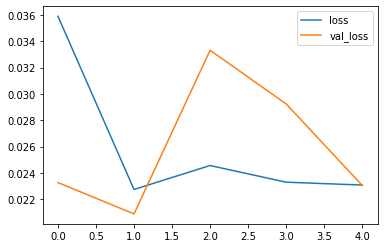

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_data_n=test_data[["season","number","storm_id","month","Moon_phase"]]

In [ ]:
test_data_n_labels=test_data[["latitude","longitude","subbasins","usa_pressure","wind"]]

In [ ]:
test_predictions=[]
first_eval_batch=scaled_trainn[-length:]
current_batch=first_eval_batch.reshape((1,length,scaled_trainn.shape[1]))

for i in range(len(test_data_n)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
new_test_predictions=np.concatenate((scaled_testt,test_predictions),axis=1)

In [ ]:
true_predictions=scaler.inverse_transform(new_test_predictions)

In [ ]:
true_predictions=pd.DataFrame(data=true_predictions,columns=test_data.columns)
true_predictions

,season,number,storm_id,month,Moon_phase,latitude,longitude,subbasins,usa_pressure,wind
0,2018.0,82.0,16.0,10.0,5.0,19.327654,-53.984429,1.571800,997.604269,43.939617
1,2018.0,82.0,16.0,10.0,5.0,17.014848,-61.681693,1.589281,1000.057620,47.133622
2,2018.0,82.0,16.0,10.0,5.0,15.064707,-65.449762,1.551777,1000.997718,48.052179
3,2018.0,82.0,16.0,10.0,5.0,13.132810,-68.780075,1.512582,1000.539332,47.786006
4,2018.0,82.0,16.0,10.0,5.0,11.369525,-71.662642,1.476226,999.172825,47.020489
5,2018.0,82.0,16.0,10.0,5.0,9.804137,-74.112403,1.441087,997.203251,45.955133
6,2018.0,82.0,16.0,10.0,5.0,8.440487,-76.183938,1.406964,994.854860,44.714611
7,2018.0,82.0,16.0,10.0,5.0,7.270282,-77.937499,1.373769,992.288813,43.383352
8,2018.0,82.0,16.0,10.0,5.0,6.278437,-79.429574,1.341487,989.620048,42.019863
9,2018.0,82.0,16.0,10.0,5.0,5.446639,-80.709434,1.310165,986.929362,40.665016


In [ ]:
test_data

,season,number,storm_id,month,Moon_phase,latitude,longitude,subbasins,usa_pressure,wind
sid,,,,,,,,,,
2018300N26315,2018,82,16,10,5,27.3342,-48.7775,1,996.0,51.0
2018300N26315,2018,82,16,10,5,27.1000,-49.9000,1,995.0,51.0
2018300N26315,2018,82,16,10,5,26.6870,-50.7708,1,995.0,51.0
2018300N26315,2018,82,16,10,5,26.2000,-51.4000,1,995.0,51.0
2018300N26315,2018,82,16,10,5,25.7315,-51.7218,1,994.0,52.0
2018300N26315,2018,82,16,10,5,25.4000,-52.0000,1,994.0,54.0
2018300N26315,2018,82,16,10,5,25.3173,-52.5249,1,994.0,54.0
2018300N26315,2018,82,16,10,5,25.4000,-53.2000,1,994.0,54.0
2018300N26315,2018,82,16,10,5,25.5650,-53.9690,1,991.0,59.0


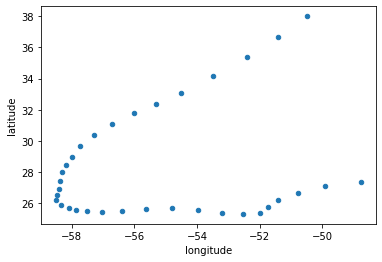

In [ ]:
test_data.plot(kind="scatter", x="longitude", y="latitude")


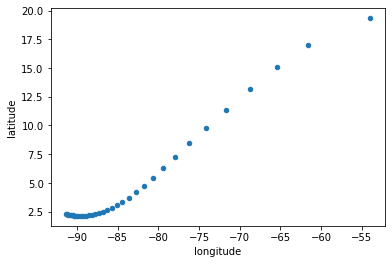

In [ ]:
true_predictions.plot(kind="scatter", x="longitude", y="latitude")

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_data.wind, true_predictions.wind)

-1.3150127373784155

# **2nd model**

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_trainn=scaled_train[:,:-5]
class_label=scaled_train[:,5:10]

In [ ]:
length=len(scaled_train)-120
batch_size=1
generator=TimeseriesGenerator(scaled_trainn,class_label,length=length,batch_size=batch_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense,LSTM

In [ ]:
model=Sequential()
model.add(LSTM(25,input_shape=(length,scaled_trainn.shape[1])))
model.add(Dense(64))
model.add(Dense(5))
model.compile(optimizer="adam",loss="mse")

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 25)                3100      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 325       
Total params: 5,089
Trainable params: 5,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
length2=len(scaled_test)-1
length2

33

In [ ]:
scaled_testt=scaled_test[:,:-5]
scaled_test_class=scaled_test[:,5:10]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=3)
validation_generator=TimeseriesGenerator(scaled_testt,scaled_test_class,length=length2,batch_size=batch_size)

In [ ]:
model.fit_generator(generator,epochs=100,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/100
120/120 [==============================] - 306s 3s/step - loss: 0.0302 - val_loss: 0.0104
Epoch 2/100
120/120 [==============================] - 308s 3s/step - loss: 0.0249 - val_loss: 0.0274
Epoch 3/100
120/120 [==============================] - 310s 3s/step - loss: 0.0245 - val_loss: 0.0214
Epoch 4/100
120/120 [==============================] - 303s 3s/step - loss: 0.0232 - val_loss: 0.0297


In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

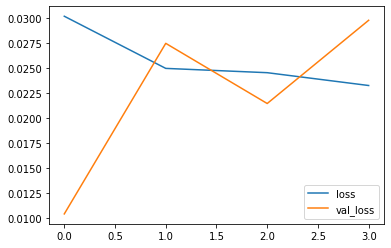

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_data_n=test_data[["season","number","storm_id","month","Moon_phase"]]
test_data_n_labels=test_data[["latitude","longitude","subbasins","usa_pressure","wind"]]

In [ ]:
test_predictions=[]
first_eval_batch=scaled_trainn[-length:]
current_batch=first_eval_batch.reshape((1,length,scaled_trainn.shape[1]))

for i in range(len(test_data_n)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
new_test_predictions=np.concatenate((scaled_testt,test_predictions),axis=1)
true_predictions=scaler.inverse_transform(new_test_predictions)

In [ ]:
true_predictions=pd.DataFrame(data=true_predictions,columns=test_data.columns)
true_predictions

,season,number,storm_id,month,Moon_phase,latitude,longitude,subbasins,usa_pressure,wind
0,2018.0,82.0,16.0,10.0,5.0,23.429600,-66.664851,0.935873,1001.447437,51.248105
1,2018.0,82.0,16.0,10.0,5.0,23.647662,-71.620901,0.799433,991.429782,46.341692
2,2018.0,82.0,16.0,10.0,5.0,23.356965,-74.999185,0.721516,984.715064,44.675164
3,2018.0,82.0,16.0,10.0,5.0,23.217202,-77.770236,0.654476,978.491232,42.847741
4,2018.0,82.0,16.0,10.0,5.0,23.156594,-80.027989,0.596774,972.761978,41.039656
5,2018.0,82.0,16.0,10.0,5.0,23.148688,-81.849611,0.547322,967.509594,39.348113
6,2018.0,82.0,16.0,10.0,5.0,23.166232,-83.316162,0.505311,962.717171,37.815199
7,2018.0,82.0,16.0,10.0,5.0,23.185553,-84.501987,0.470010,958.365071,36.451973
8,2018.0,82.0,16.0,10.0,5.0,23.188608,-85.470628,0.440716,954.432000,35.252585
9,2018.0,82.0,16.0,10.0,5.0,23.163213,-86.274101,0.416741,950.895233,34.202803


In [ ]:
test_data

,season,number,storm_id,month,Moon_phase,latitude,longitude,subbasins,usa_pressure,wind
sid,,,,,,,,,,
2018300N26315,2018,82,16,10,5,27.3342,-48.7775,1,996.0,51.0
2018300N26315,2018,82,16,10,5,27.1000,-49.9000,1,995.0,51.0
2018300N26315,2018,82,16,10,5,26.6870,-50.7708,1,995.0,51.0
2018300N26315,2018,82,16,10,5,26.2000,-51.4000,1,995.0,51.0
2018300N26315,2018,82,16,10,5,25.7315,-51.7218,1,994.0,52.0
2018300N26315,2018,82,16,10,5,25.4000,-52.0000,1,994.0,54.0
2018300N26315,2018,82,16,10,5,25.3173,-52.5249,1,994.0,54.0
2018300N26315,2018,82,16,10,5,25.4000,-53.2000,1,994.0,54.0
2018300N26315,2018,82,16,10,5,25.5650,-53.9690,1,991.0,59.0


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_data.wind, true_predictions.wind)

-1.0624884205650766

# **3rd model**

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
scaled_trainn=scaled_train[:,:-5]
class_label=scaled_train[:,5:10]

In [ ]:
length=len(scaled_train)-300
batch_size=1
generator=TimeseriesGenerator(scaled_trainn,class_label,length=length,batch_size=batch_size)

In [ ]:
model=Sequential()
model.add(LSTM(25,input_shape=(length,scaled_trainn.shape[1])))
model.add(Dense(5))
model.compile(optimizer="adam",loss="mse")

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 25)                3100      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 130       
Total params: 3,230
Trainable params: 3,230
Non-trainable params: 0
_________________________________________________________________


In [ ]:
length2=len(scaled_test)-1
length2

33

In [ ]:
scaled_testt=scaled_test[:,:-5]
scaled_test_class=scaled_test[:,5:10]

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",patience=3)
validation_generator=TimeseriesGenerator(scaled_testt,scaled_test_class,length=length2,batch_size=batch_size)

In [ ]:
model.fit_generator(generator,epochs=100,validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/100
300/300 [==============================] - 768s 3s/step - loss: 0.0233 - val_loss: 0.0125
Epoch 2/100
300/300 [==============================] - 759s 3s/step - loss: 0.0165 - val_loss: 0.0091
Epoch 3/100
300/300 [==============================] - 751s 3s/step - loss: 0.0160 - val_loss: 0.0129
Epoch 4/100
300/300 [==============================] - 754s 3s/step - loss: 0.0158 - val_loss: 0.0073
Epoch 5/100
300/300 [==============================] - 746s 2s/step - loss: 0.0153 - val_loss: 0.0175
Epoch 6/100
300/300 [==============================] - 751s 3s/step - loss: 0.0145 - val_loss: 0.0088
Epoch 7/100
300/300 [==============================] - 753s 3s/step - loss: 0.0134 - val_loss: 0.0030
Epoch 8/100
300/300 [==============================] - 753s 3s/step - loss: 0.0133 - val_loss: 0.0128
Epoch 9/100
300/300 [==============================] - 748s 2s/step - loss: 0.0124 - val_loss: 0.0135
Epoch 10/100
300/300 [==============================] - 750s 2s/step - loss: 0.012

In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

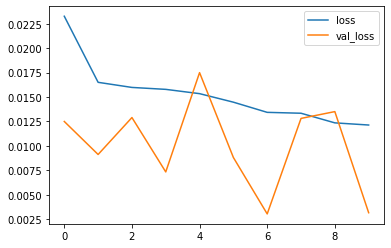

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
test_data_n=test_data[["season","number","storm_id","month","Moon_phase"]]
test_data_n_labels=test_data[["latitude","longitude","subbasins","usa_pressure","wind"]]

In [ ]:
test_predictions=[]
first_eval_batch=scaled_trainn[-length:]
current_batch=first_eval_batch.reshape((1,length,scaled_trainn.shape[1]))

for i in range(len(test_data_n)):
  current_pred=model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
new_test_predictions=np.concatenate((scaled_testt,test_predictions),axis=1)
true_predictions=scaler.inverse_transform(new_test_predictions)

In [ ]:
true_predictions=pd.DataFrame(data=true_predictions,columns=test_data.columns)
true_predictions

,season,number,storm_id,month,Moon_phase,latitude,longitude,subbasins,usa_pressure,wind
0,2018.0,82.0,16.0,10.0,5.0,22.027306,-47.005477,1.457341,991.322850,44.654538
1,2018.0,82.0,16.0,10.0,5.0,20.031454,-41.075293,1.199338,991.831595,46.627821
2,2018.0,82.0,16.0,10.0,5.0,20.120888,-39.682402,1.015757,989.374968,47.907331
3,2018.0,82.0,16.0,10.0,5.0,20.500038,-39.928387,0.881961,987.243972,49.914621
4,2018.0,82.0,16.0,10.0,5.0,20.994761,-40.943055,0.779420,985.402871,51.784253
5,2018.0,82.0,16.0,10.0,5.0,21.480349,-42.319356,0.702758,983.750124,53.311377
6,2018.0,82.0,16.0,10.0,5.0,21.902892,-43.790962,0.646754,982.247865,54.440511
7,2018.0,82.0,16.0,10.0,5.0,22.241728,-45.203155,0.606759,980.879031,55.196170
8,2018.0,82.0,16.0,10.0,5.0,22.495556,-46.475109,0.578897,979.636756,55.637817
9,2018.0,82.0,16.0,10.0,5.0,22.673129,-47.573631,0.560046,978.517326,55.834967


In [ ]:
test_data

,season,number,storm_id,month,Moon_phase,latitude,longitude,subbasins,usa_pressure,wind
sid,,,,,,,,,,
2018300N26315,2018,82,16,10,5,27.3342,-48.7775,1,996.0,51.0
2018300N26315,2018,82,16,10,5,27.1000,-49.9000,1,995.0,51.0
2018300N26315,2018,82,16,10,5,26.6870,-50.7708,1,995.0,51.0
2018300N26315,2018,82,16,10,5,26.2000,-51.4000,1,995.0,51.0
2018300N26315,2018,82,16,10,5,25.7315,-51.7218,1,994.0,52.0
2018300N26315,2018,82,16,10,5,25.4000,-52.0000,1,994.0,54.0
2018300N26315,2018,82,16,10,5,25.3173,-52.5249,1,994.0,54.0
2018300N26315,2018,82,16,10,5,25.4000,-53.2000,1,994.0,54.0
2018300N26315,2018,82,16,10,5,25.5650,-53.9690,1,991.0,59.0


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(test_data.wind, true_predictions.wind)

0.137746602112221

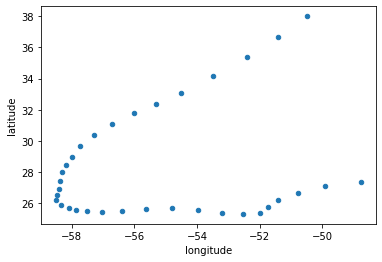

In [ ]:
test_data.plot(kind="scatter", x="longitude", y="latitude")

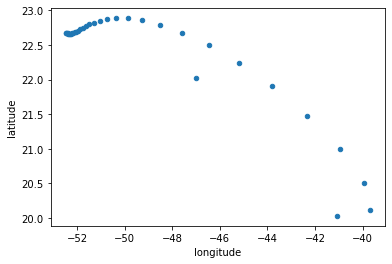

In [ ]:
true_predictions.plot(kind="scatter", x="longitude", y="latitude")

It is noticable, that even with extra parameters, model fails to generalize.